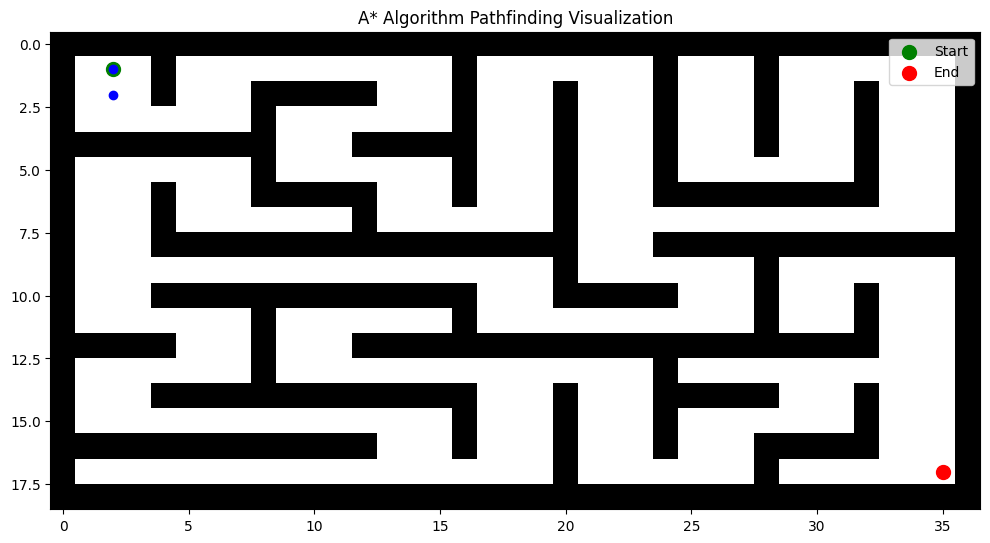

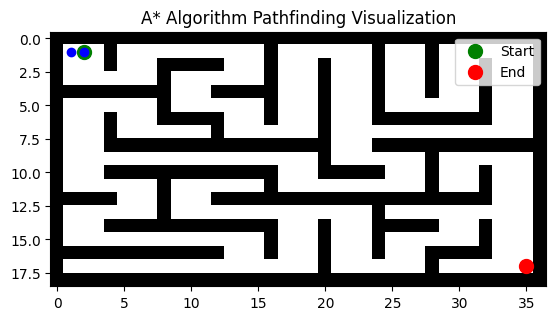

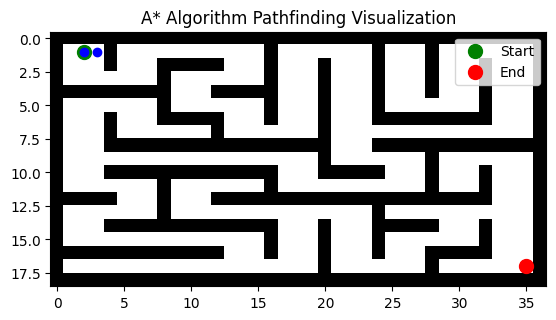

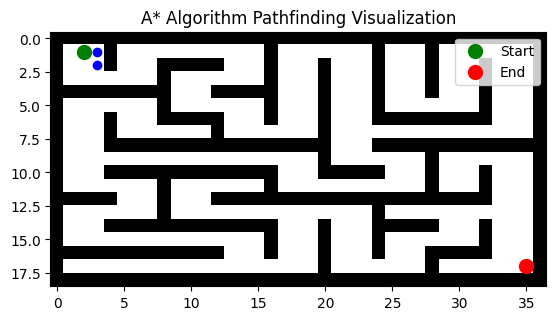

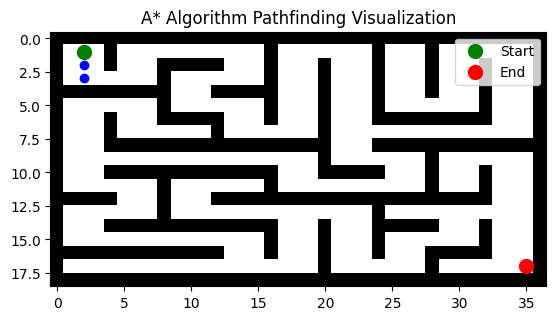

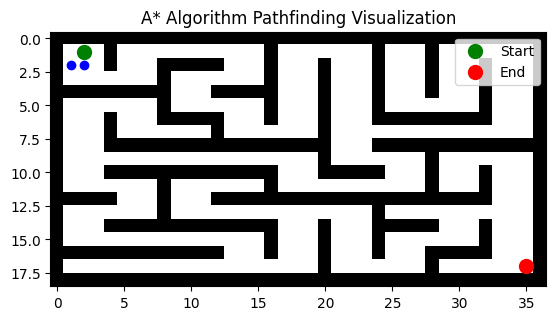

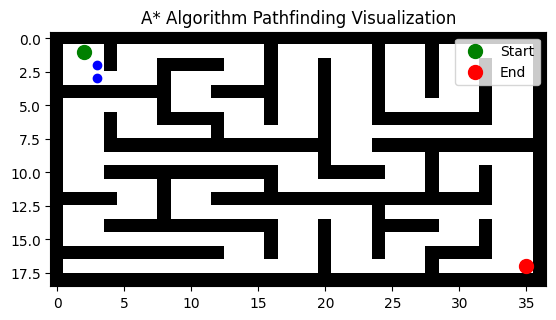

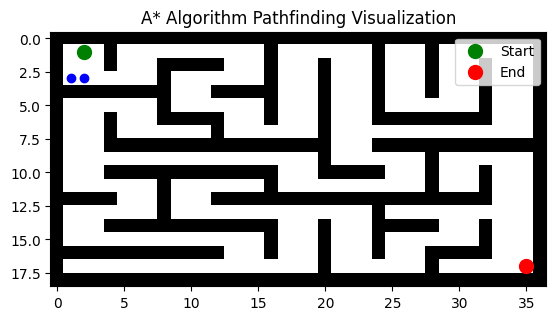

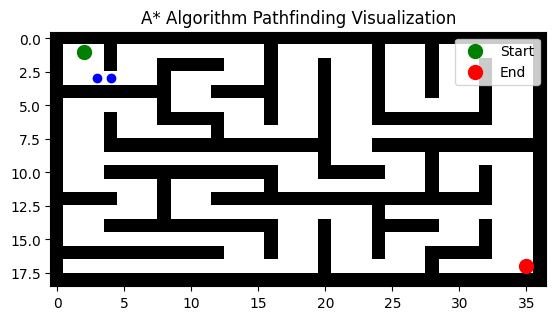

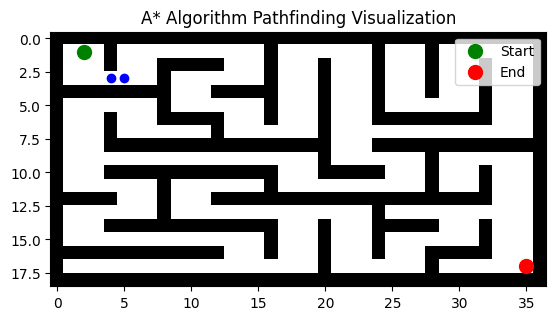

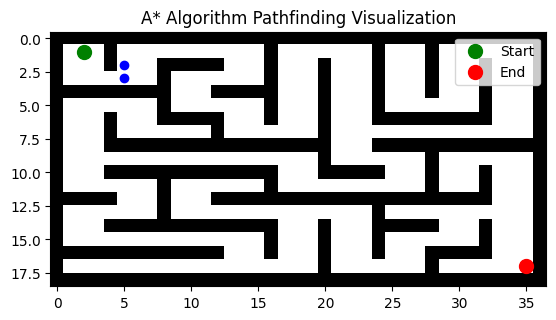

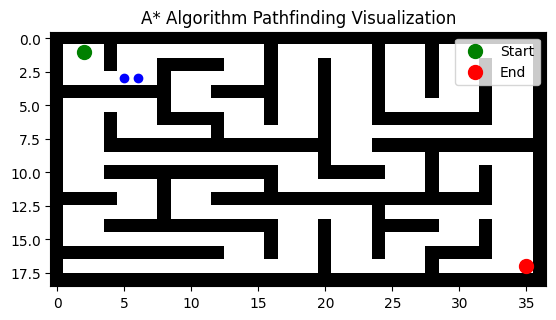

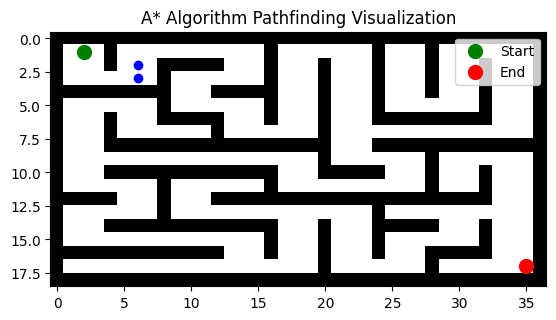

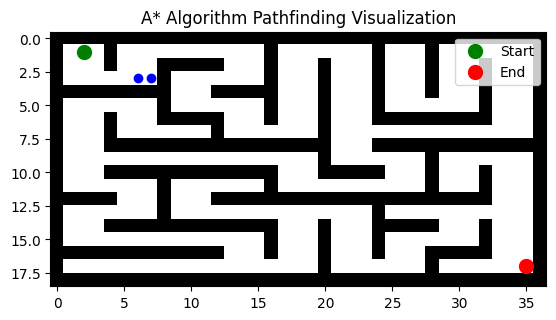

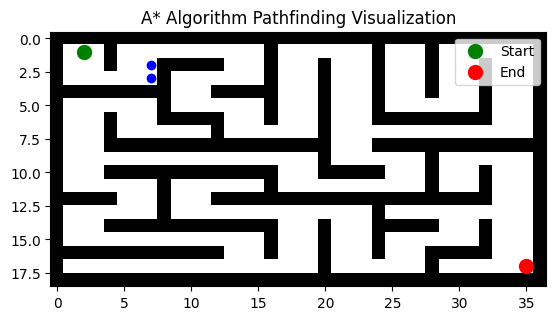

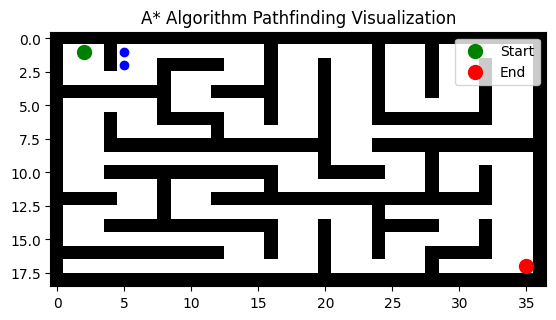

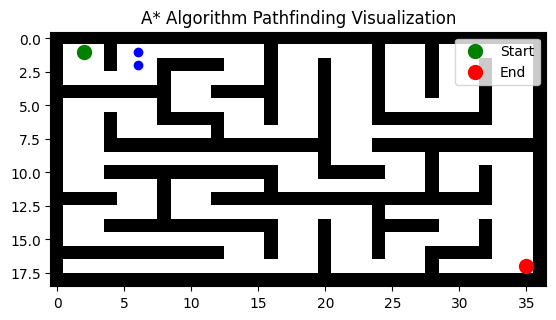

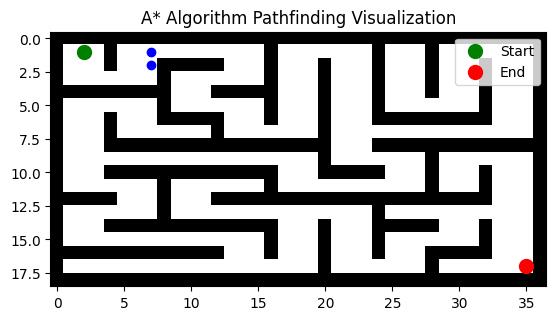

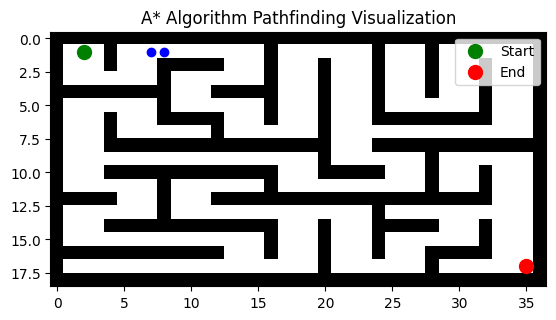

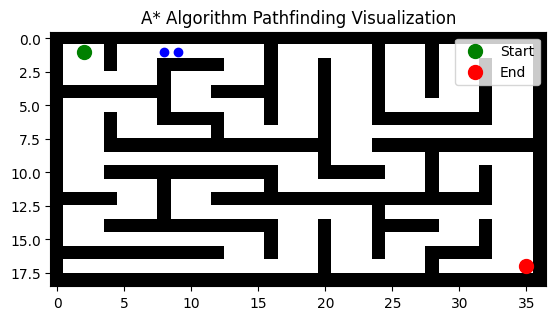

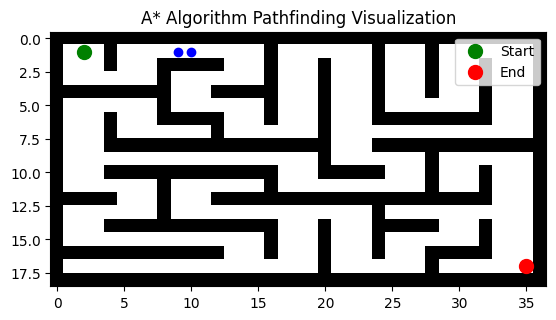

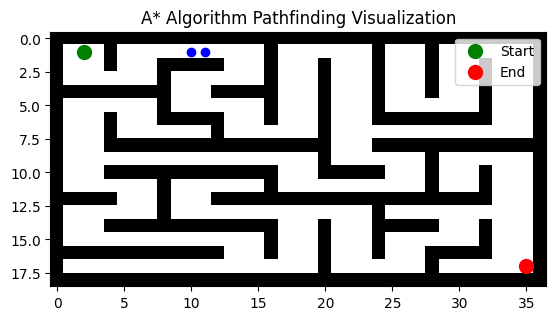

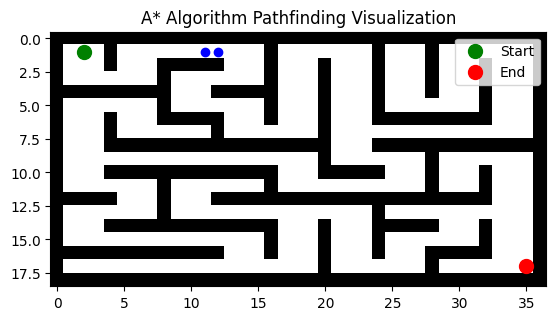

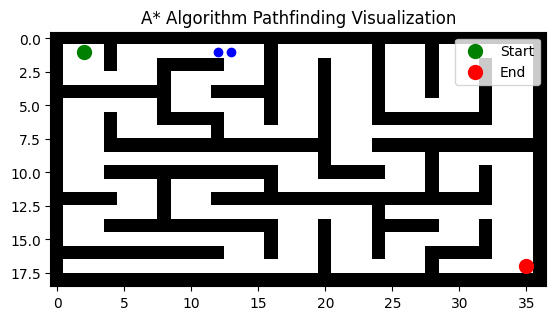

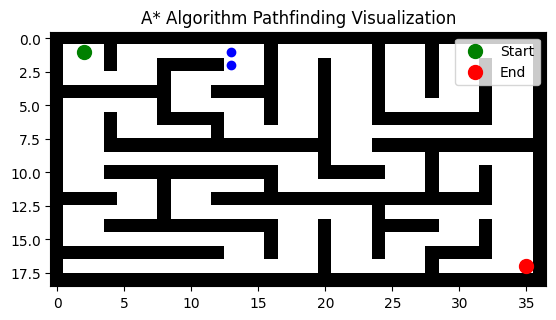

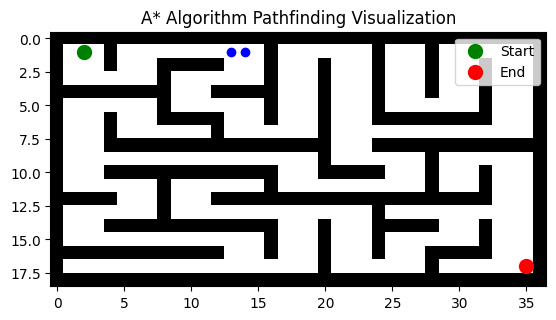

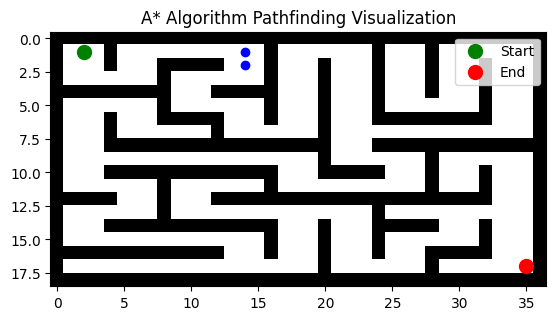

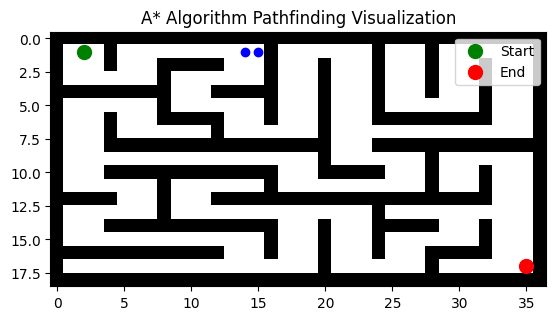

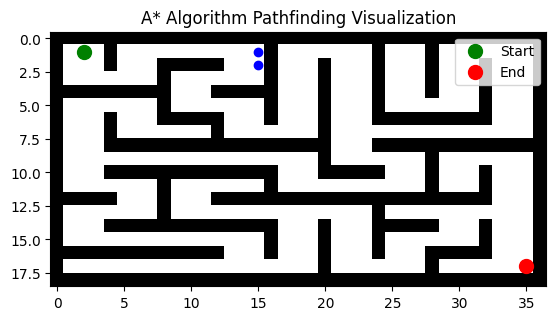

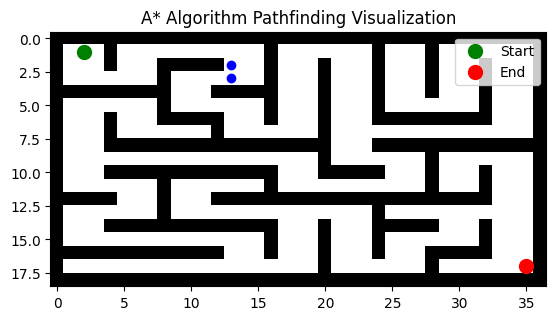

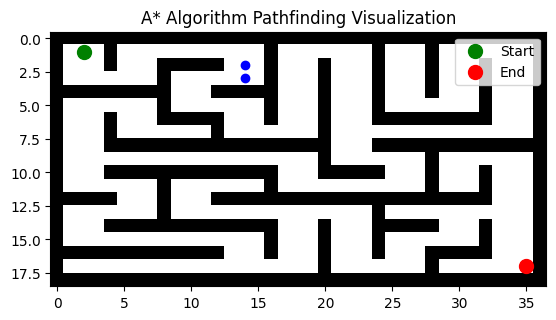

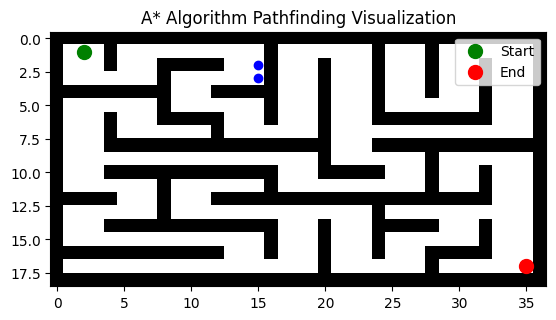

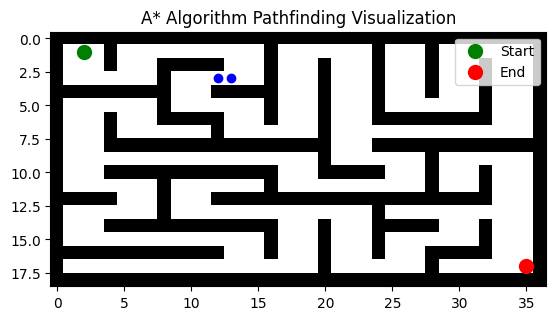

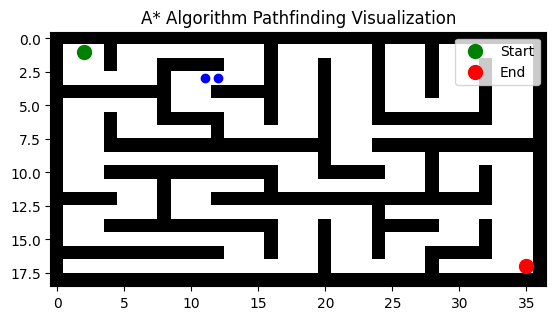

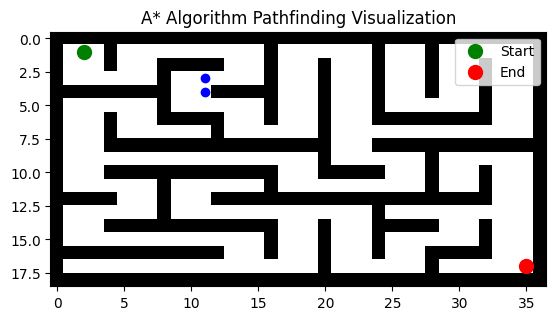

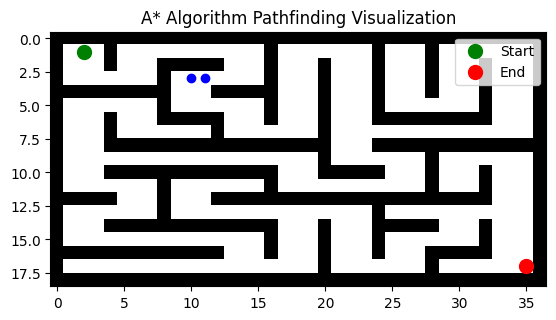

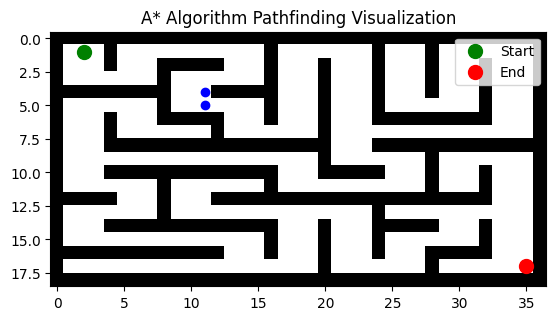

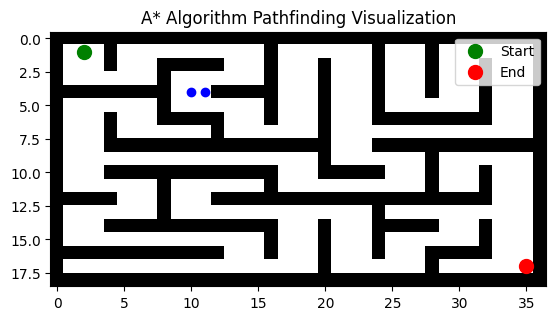

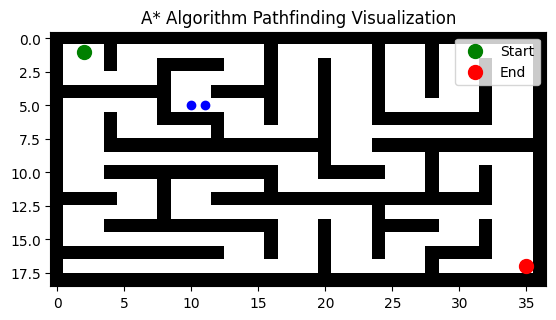

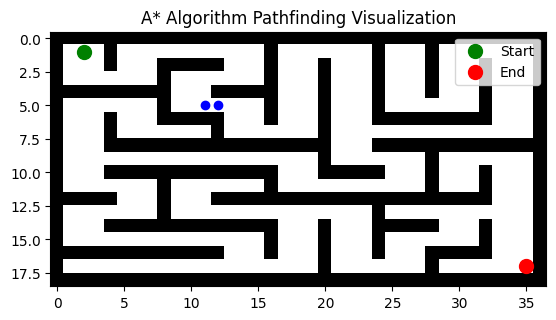

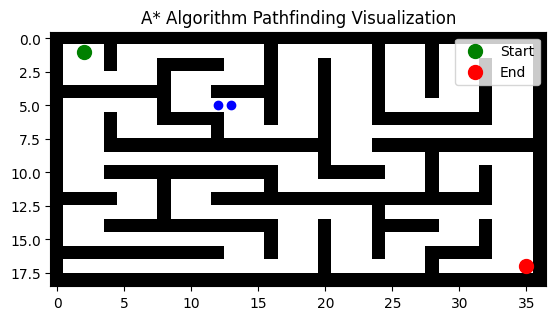

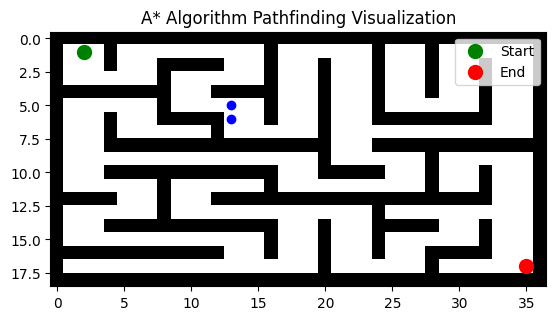

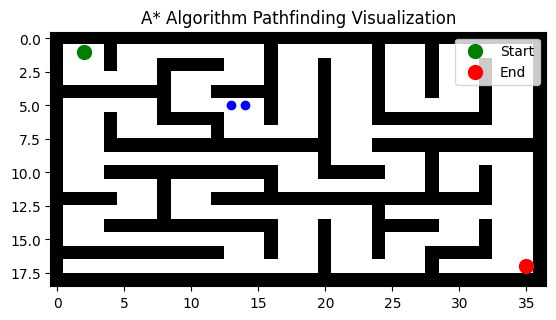

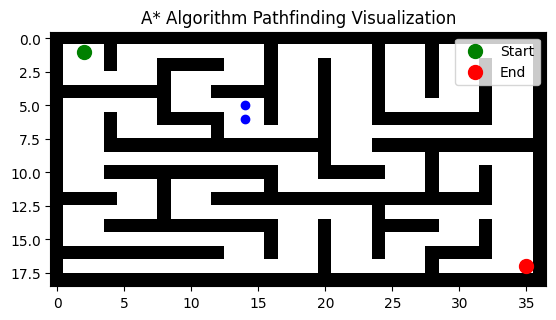

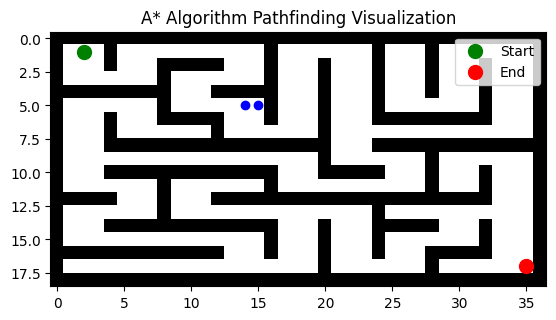

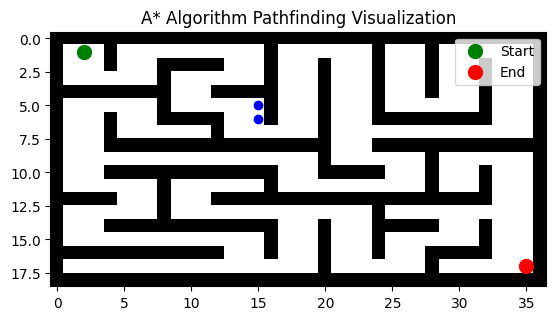

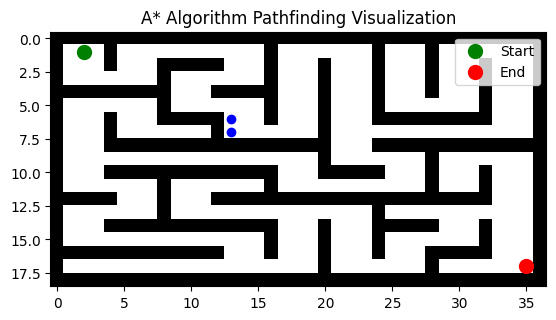

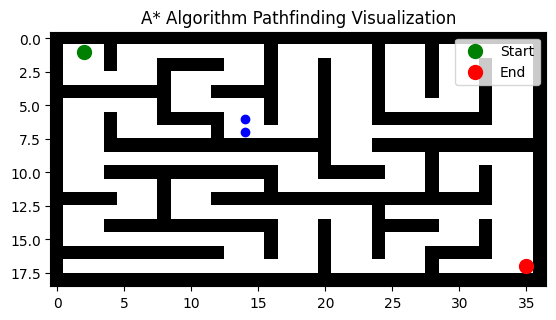

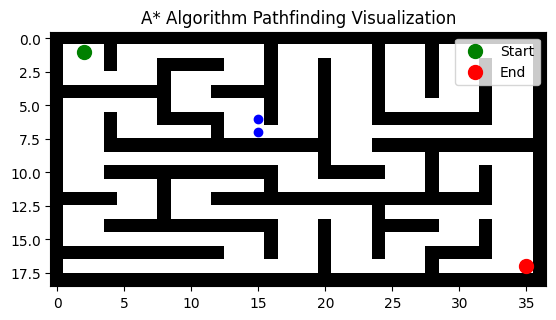

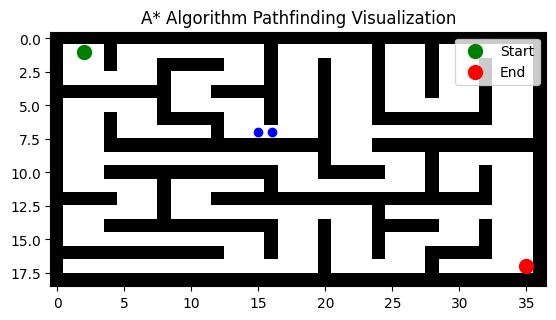

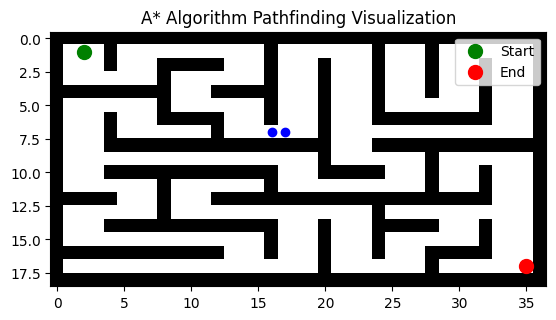

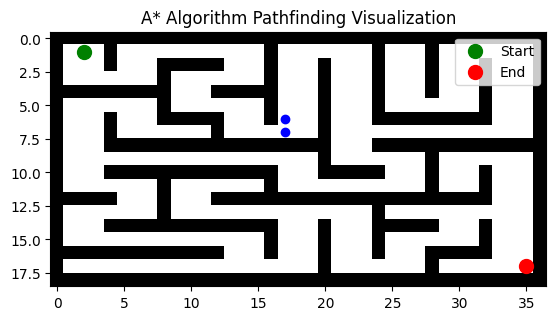

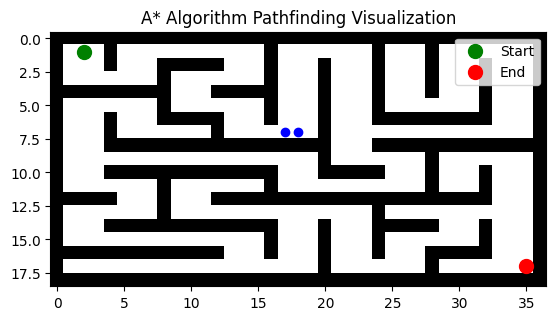

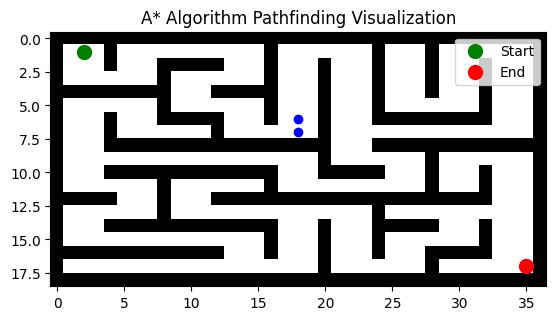

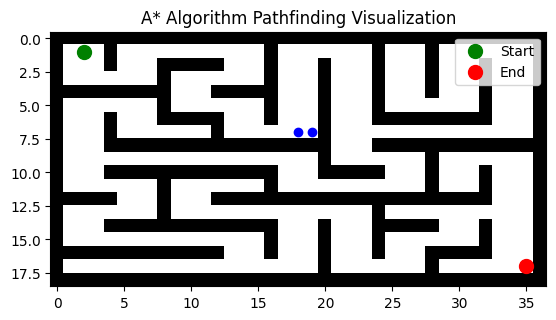

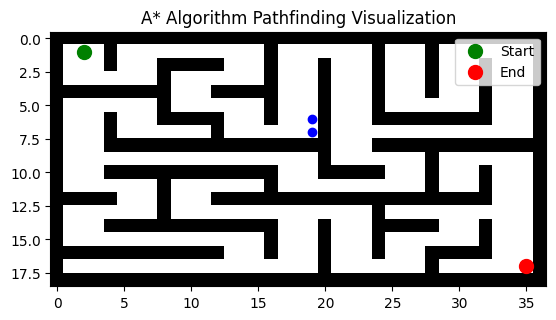

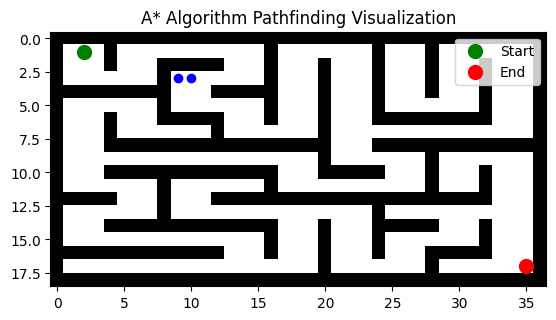

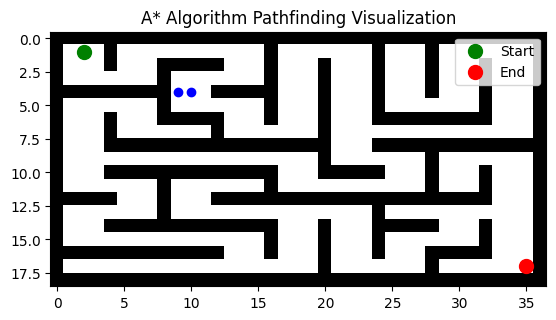

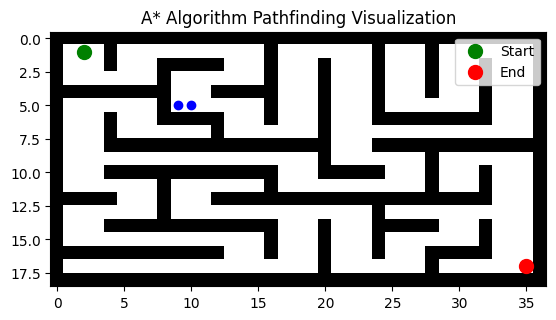

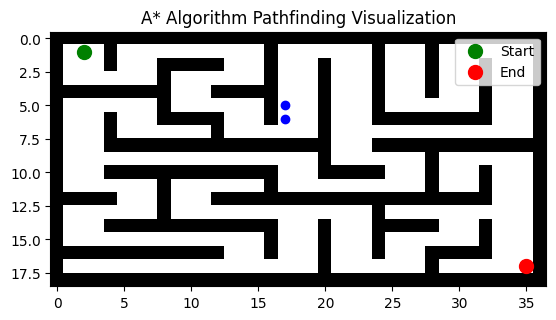

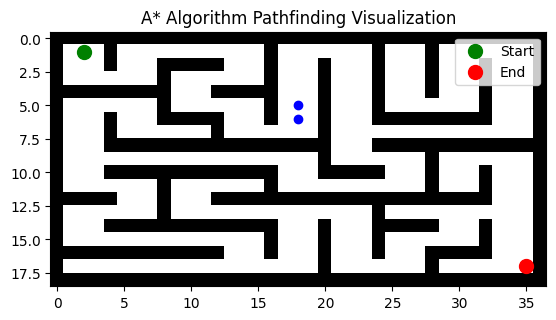

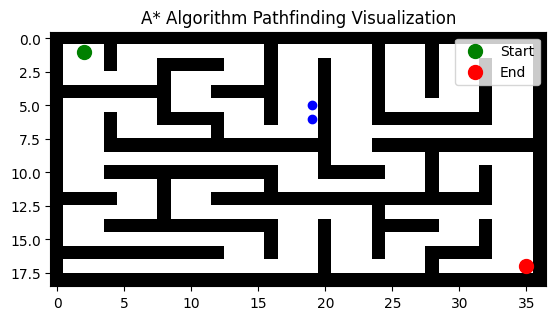

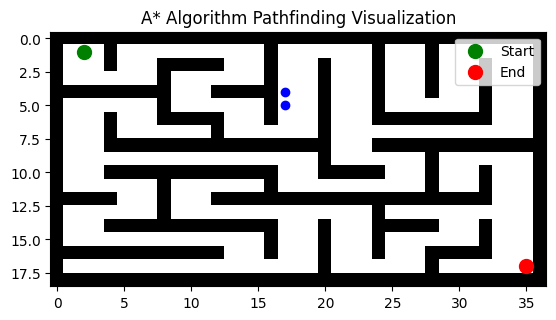

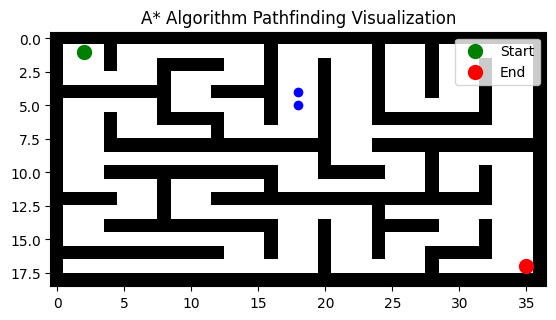

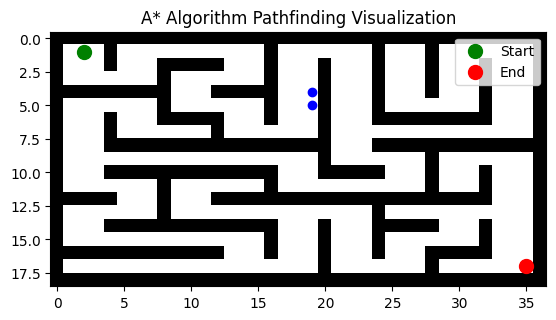

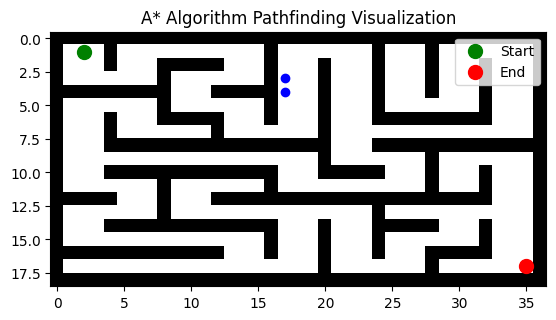

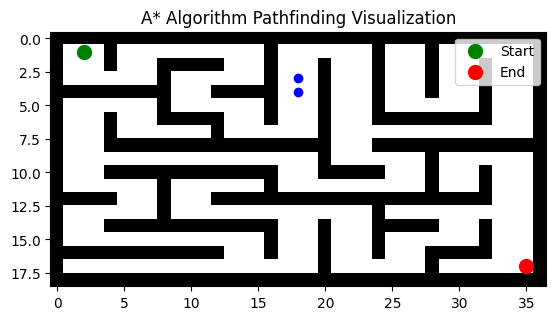

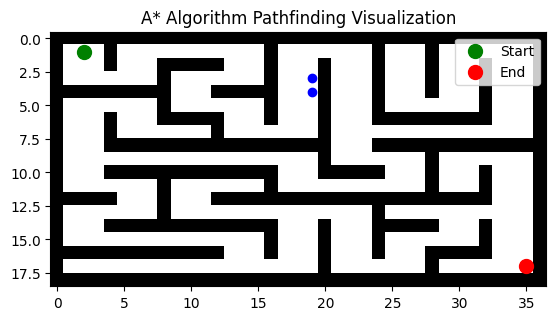

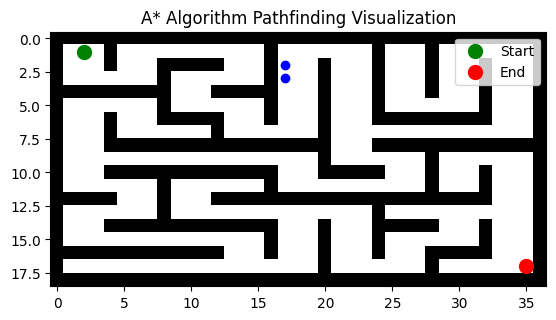

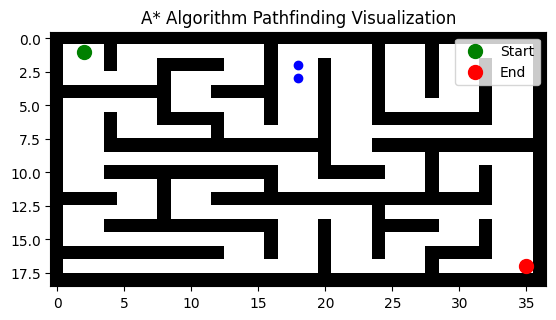

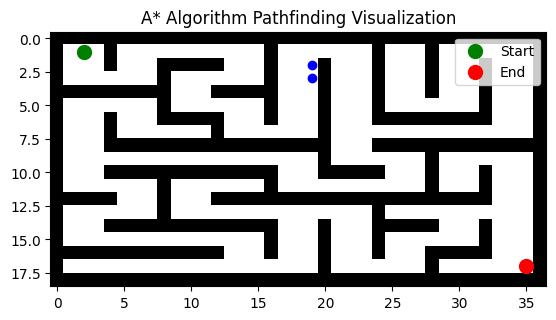

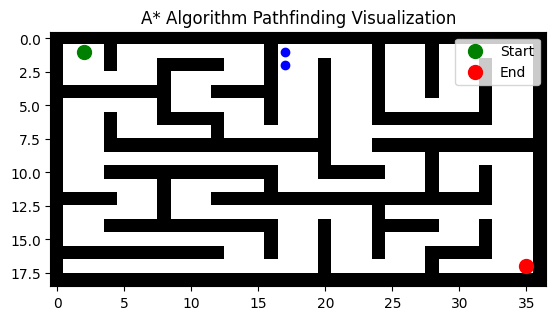

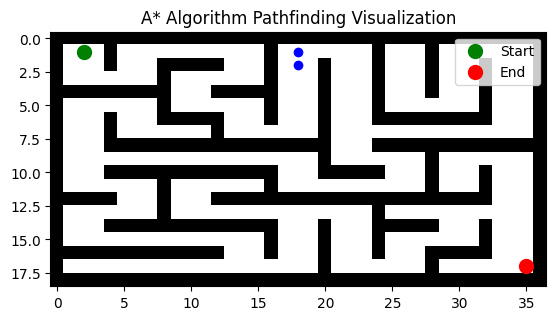

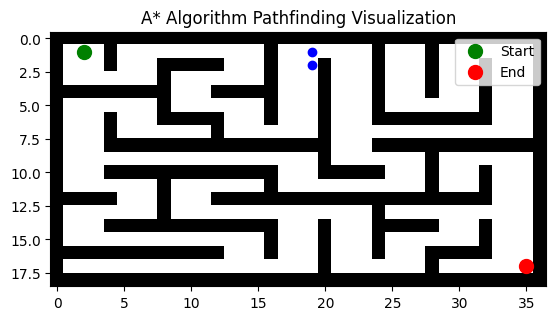

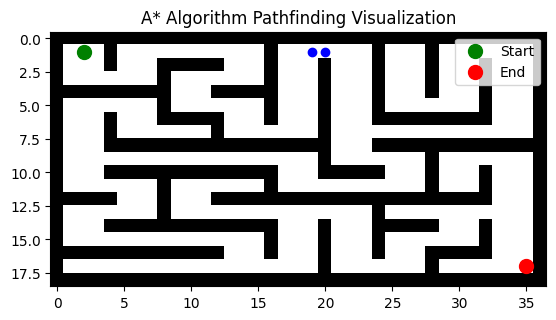

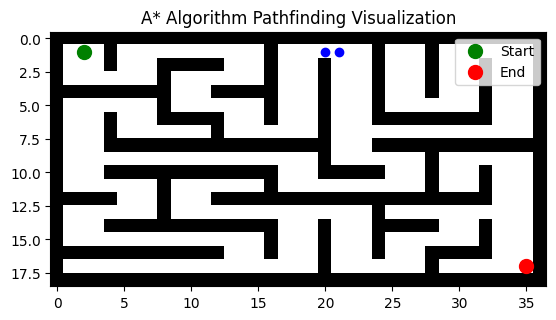

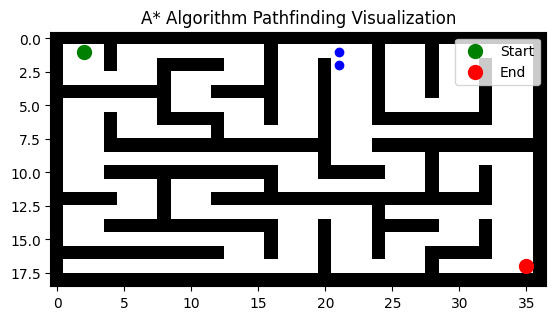

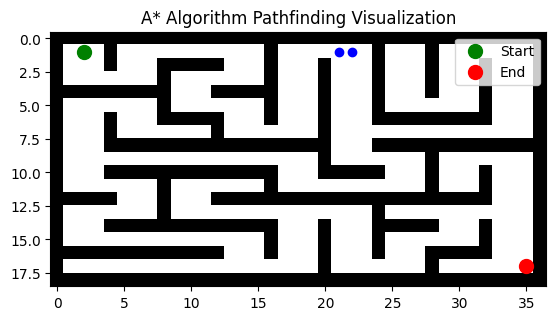

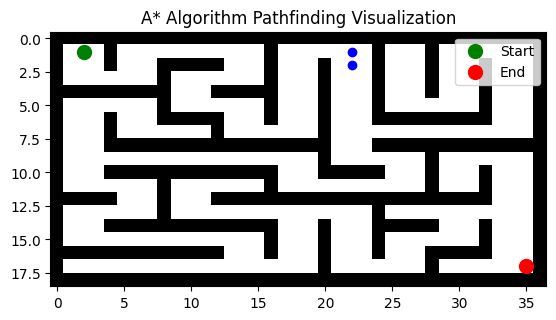

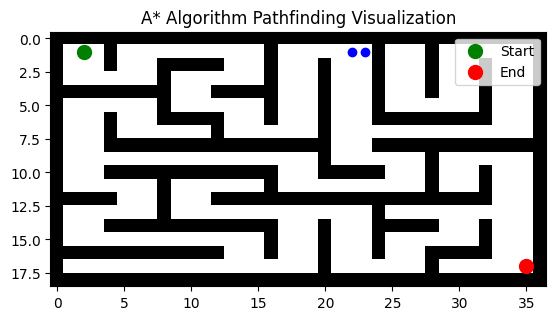

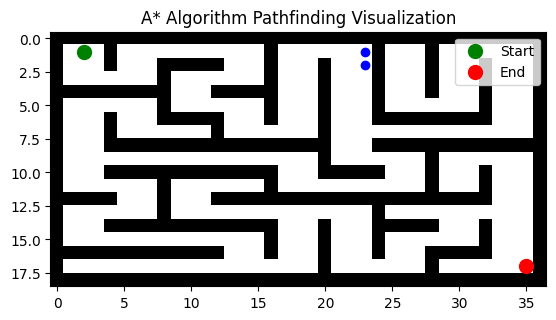

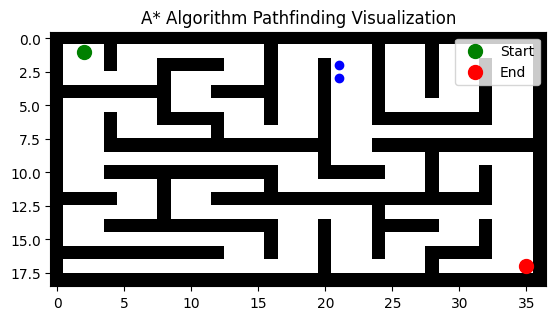

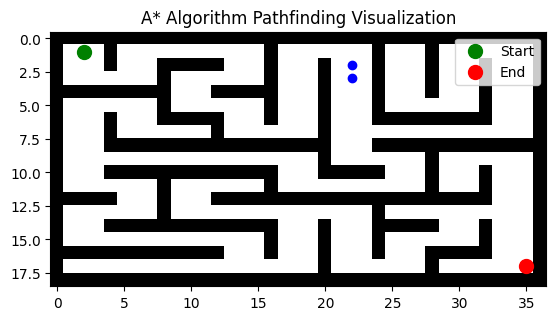

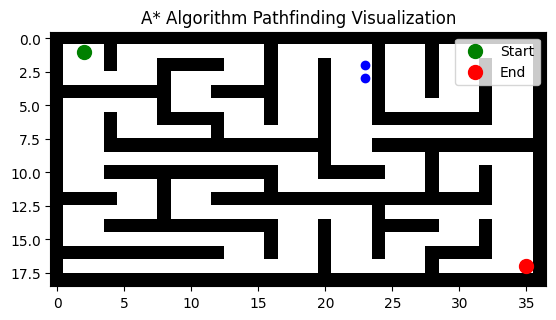

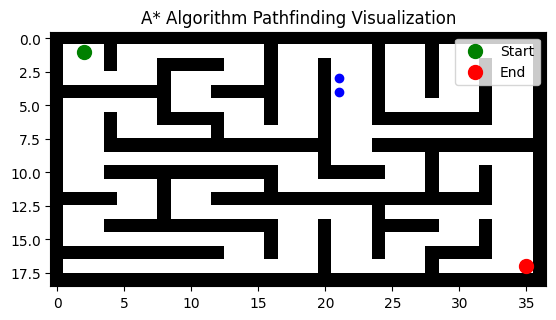

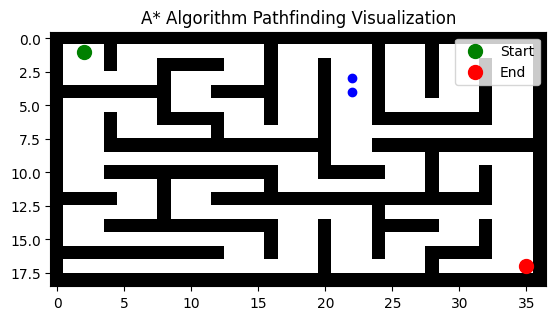

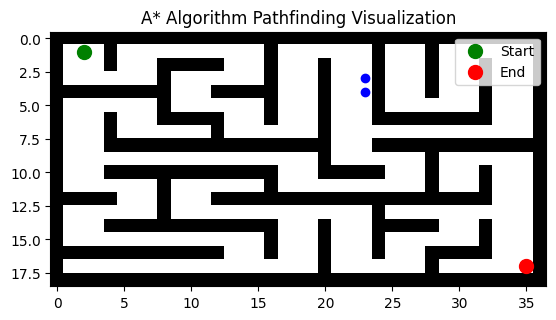

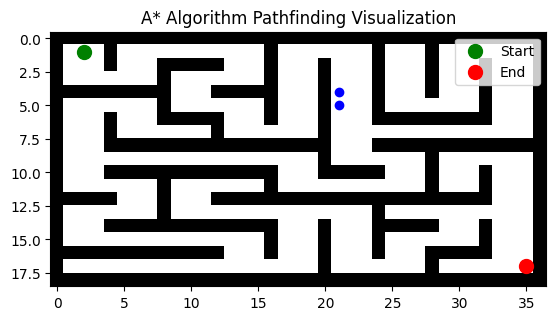

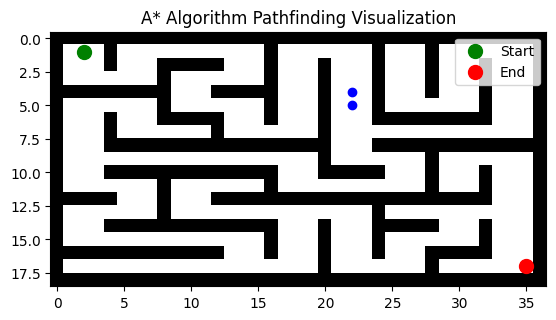

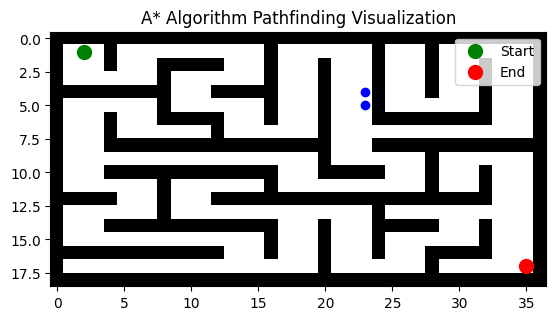

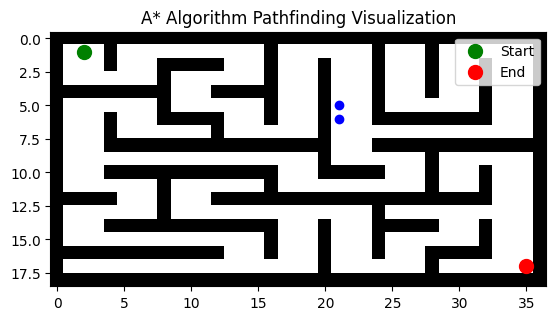

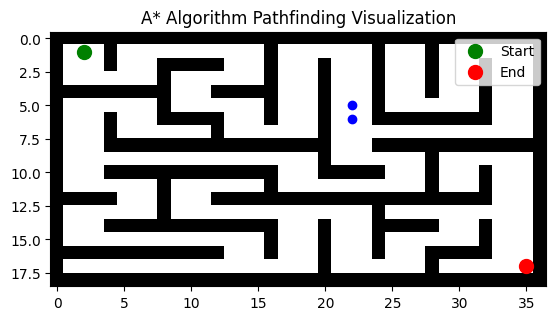

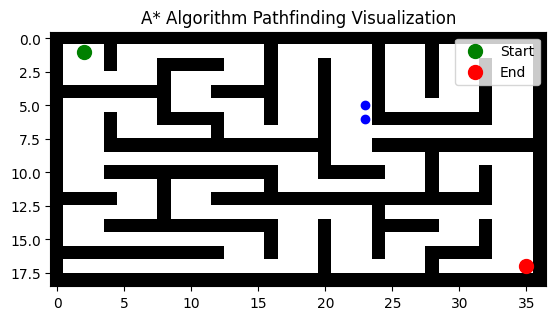

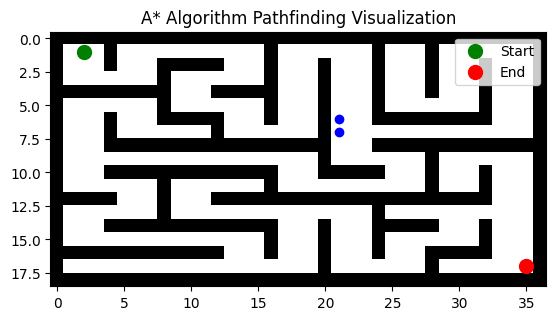

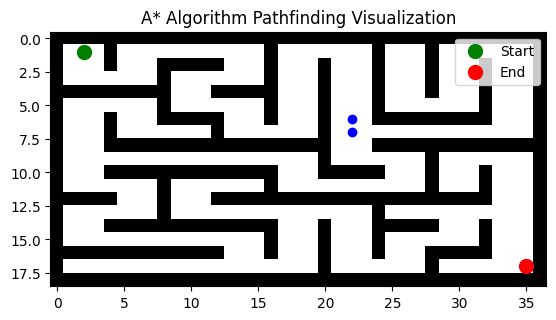

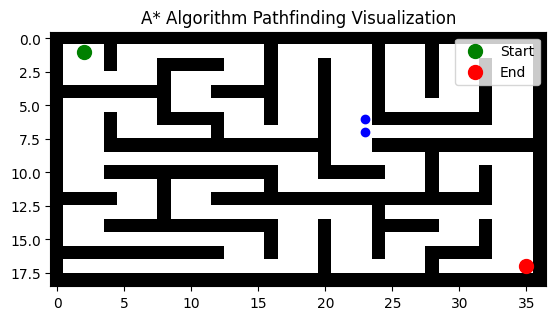

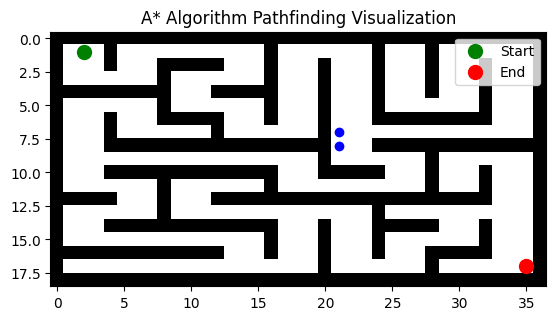

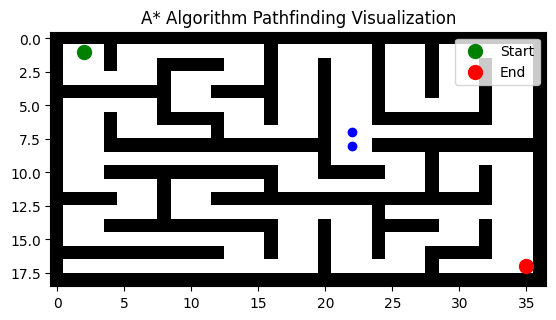

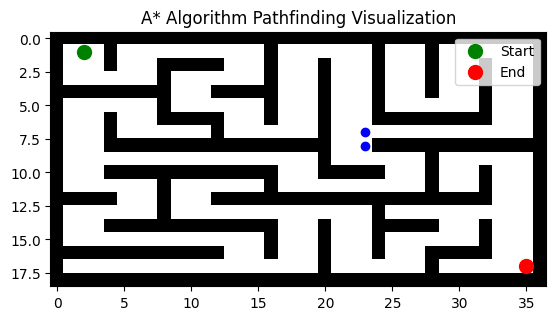

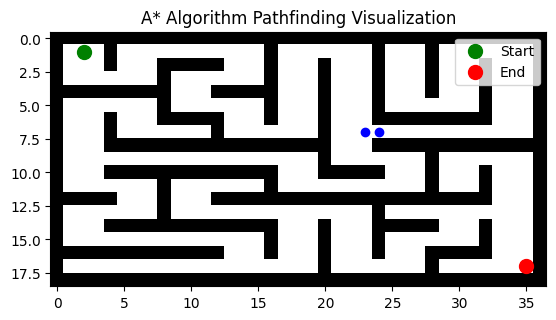

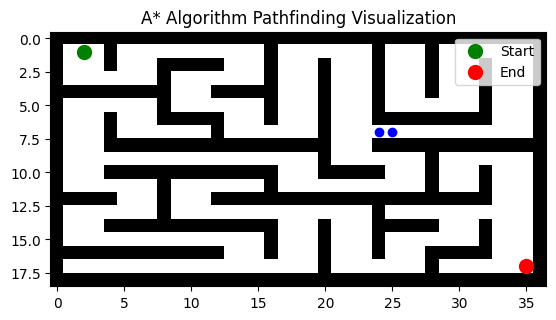

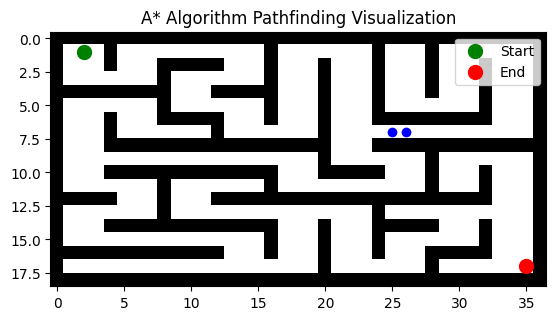

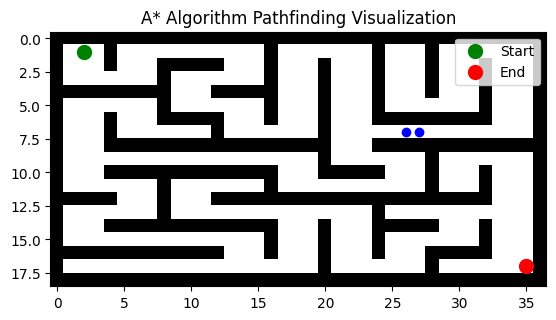

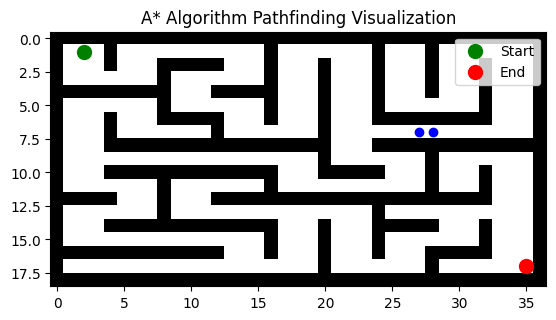

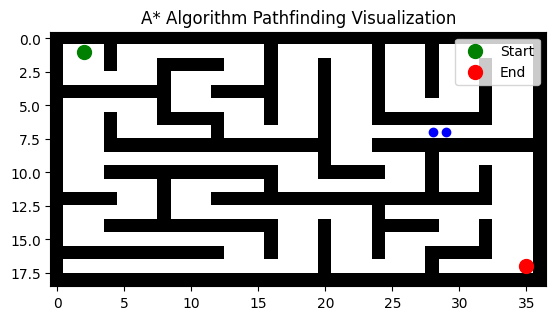

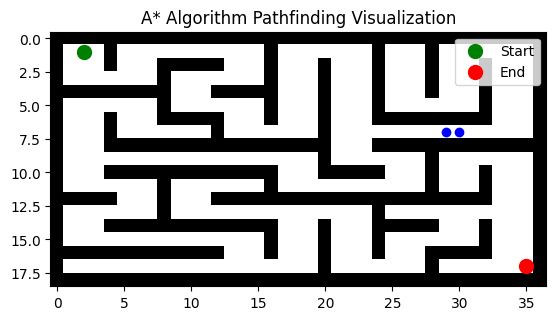

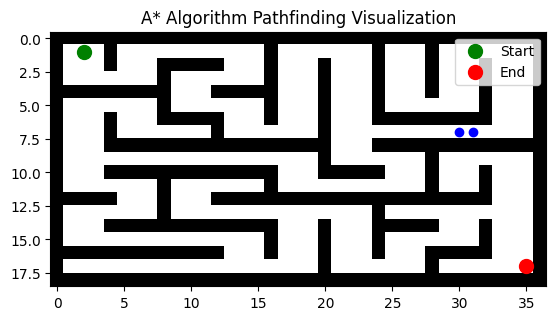

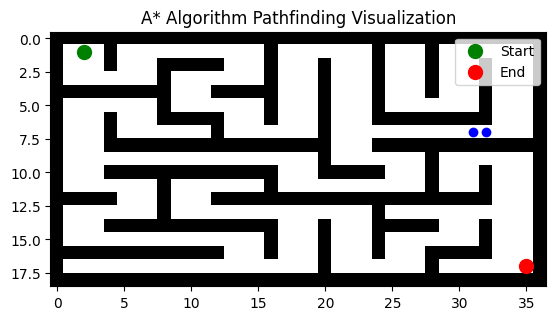

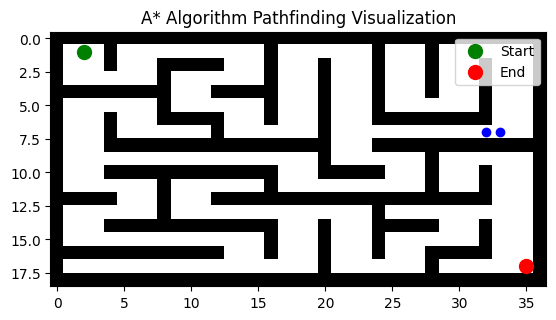

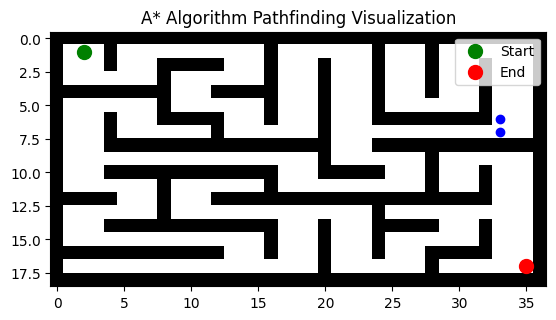

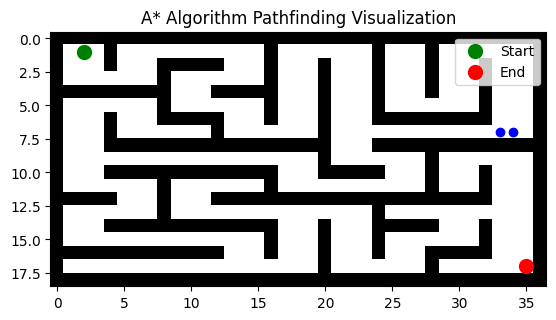

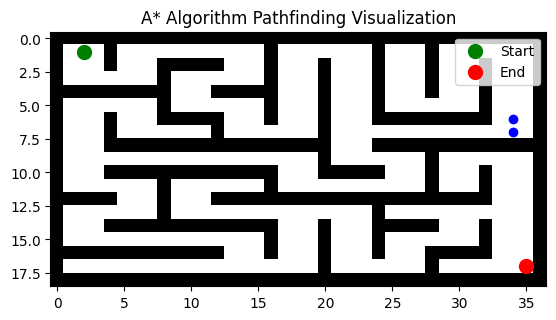

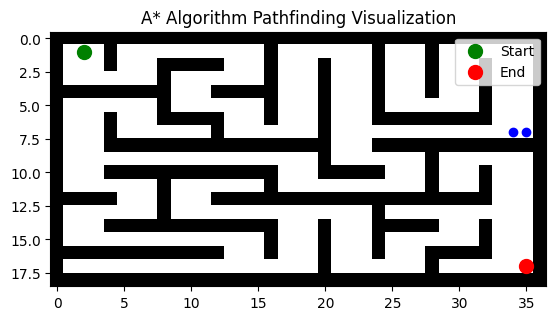

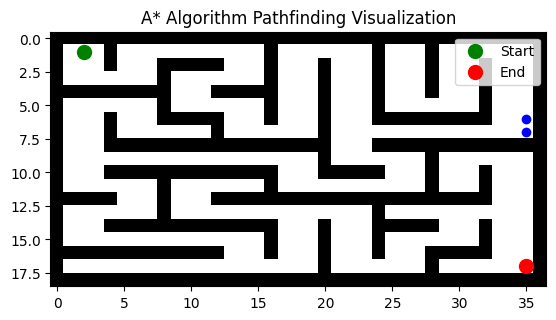

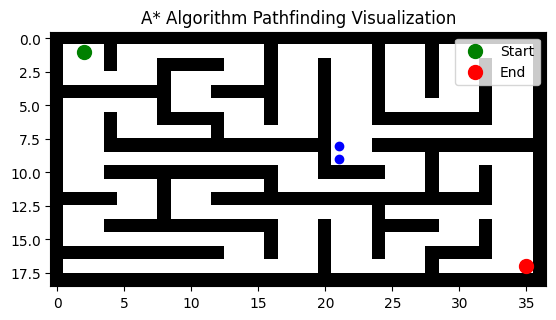

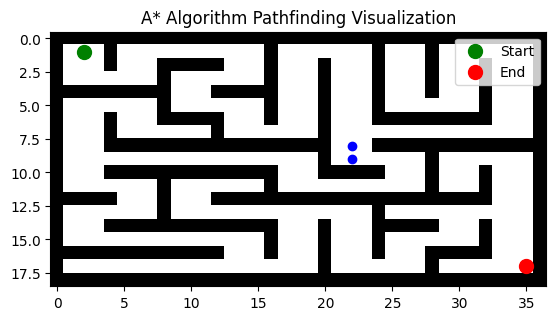

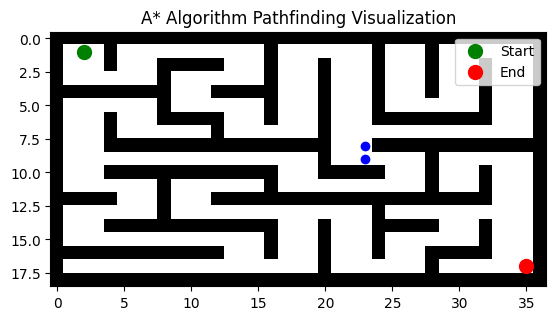

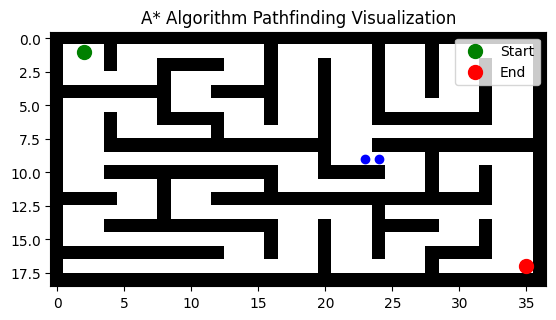

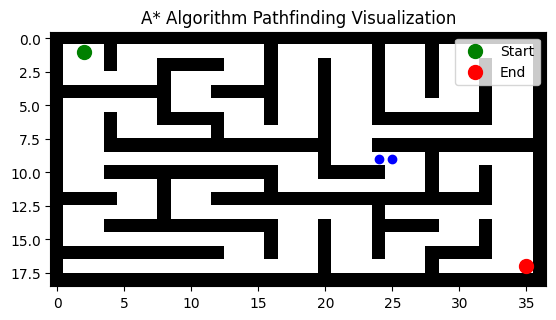

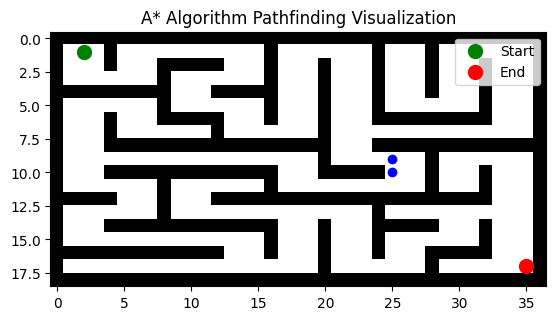

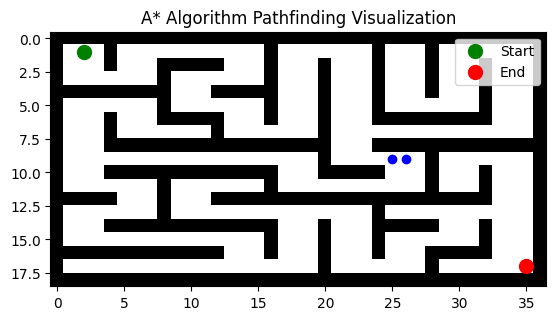

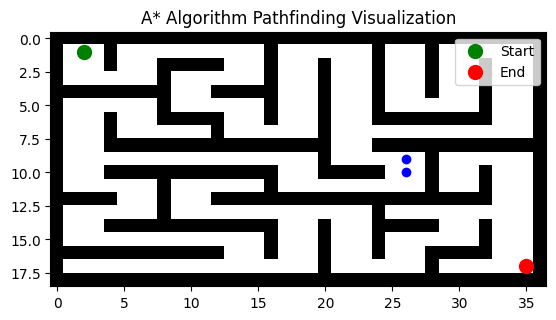

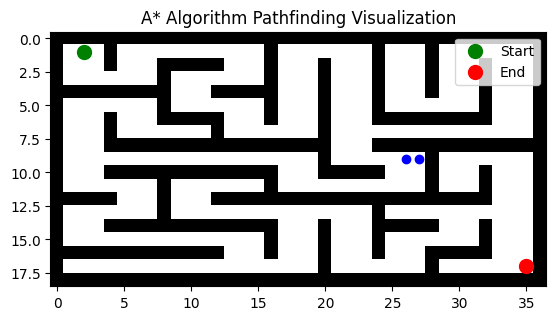

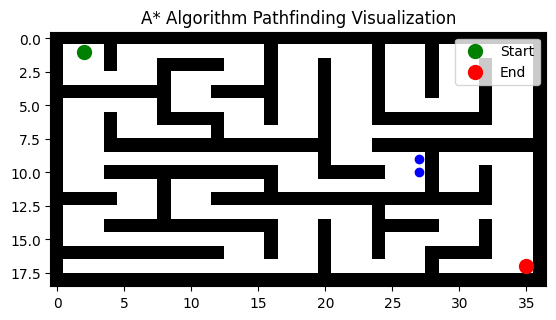

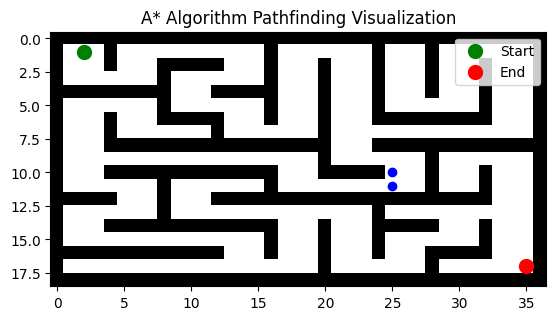

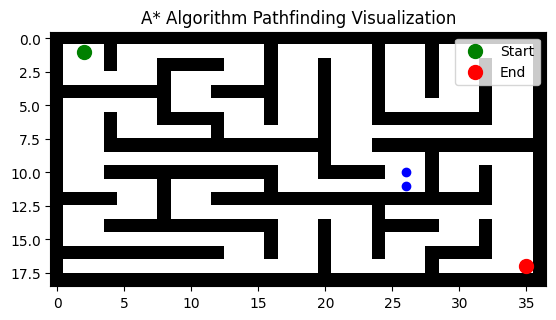

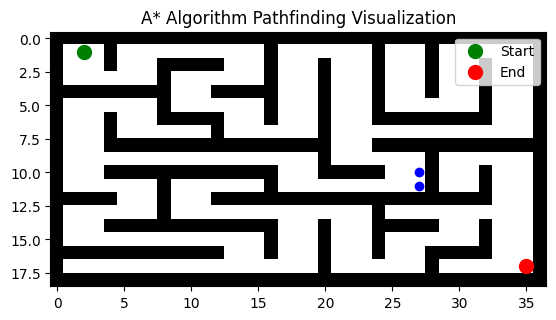

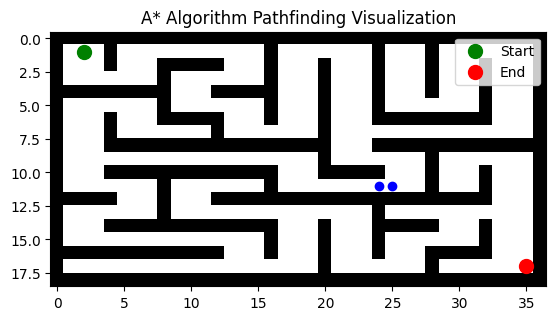

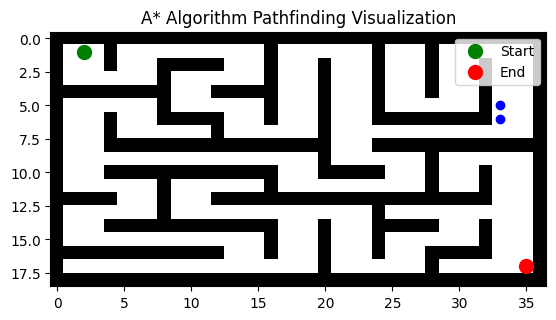

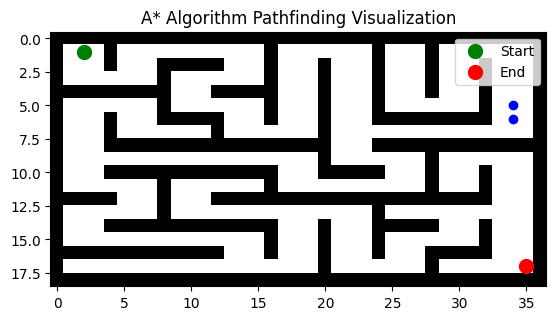

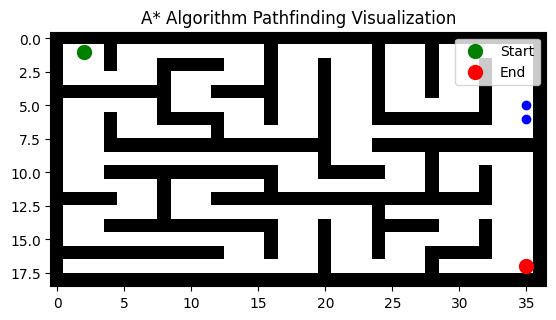

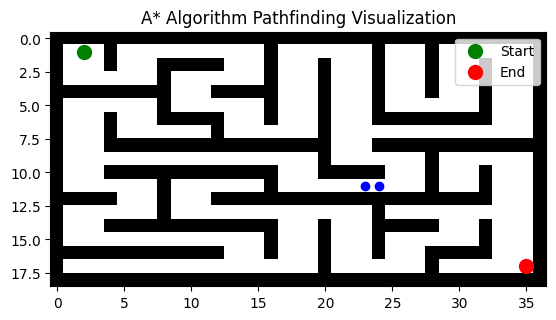

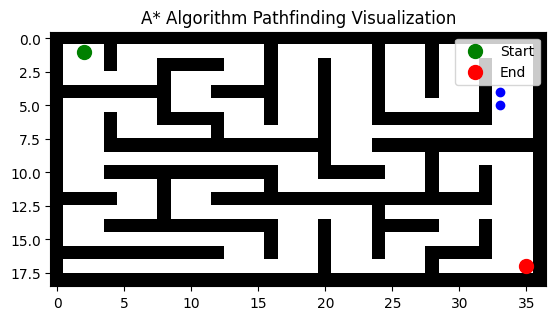

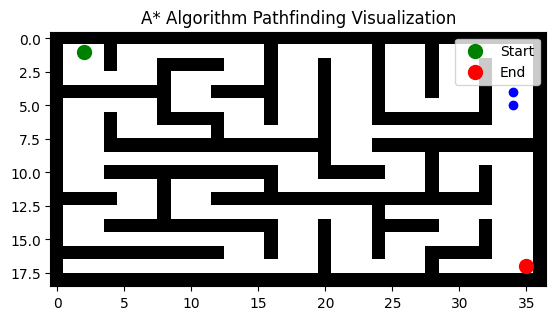

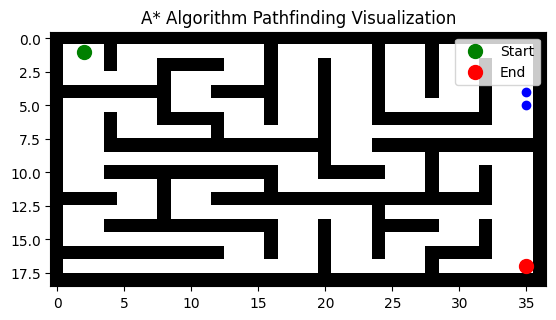

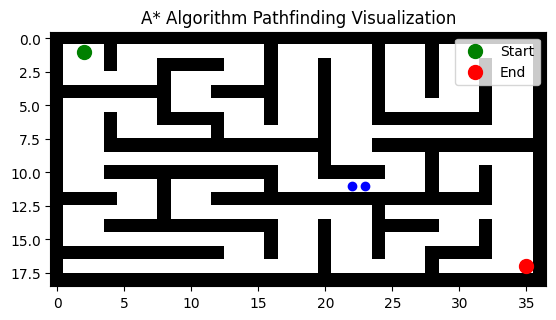

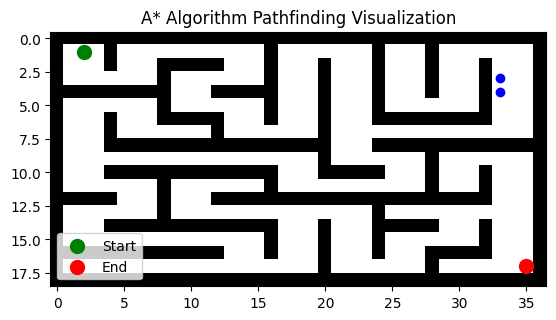

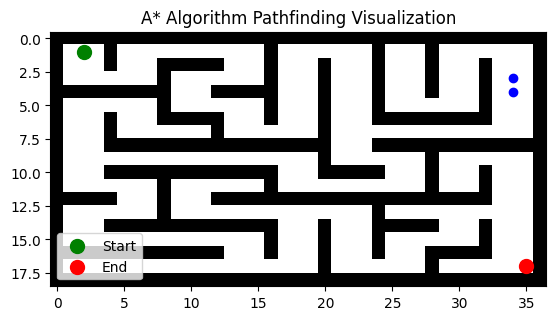

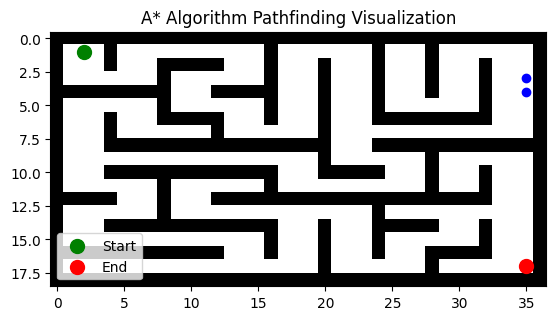

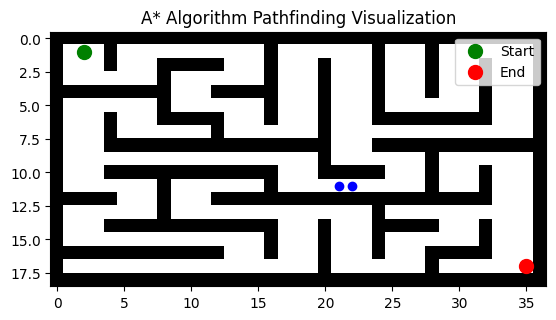

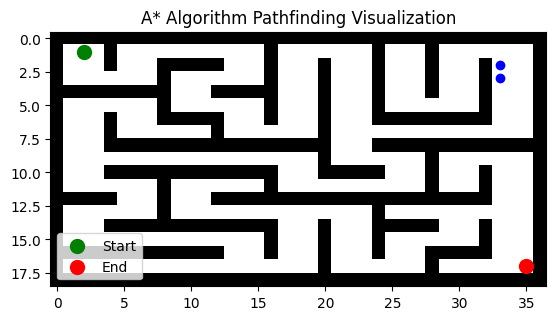

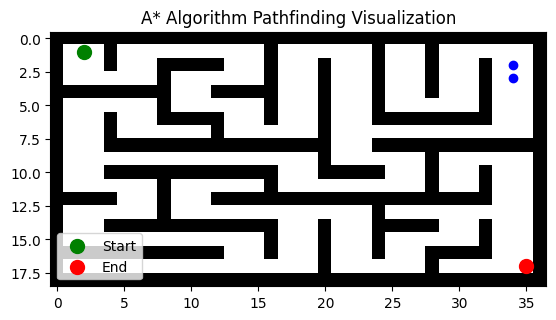

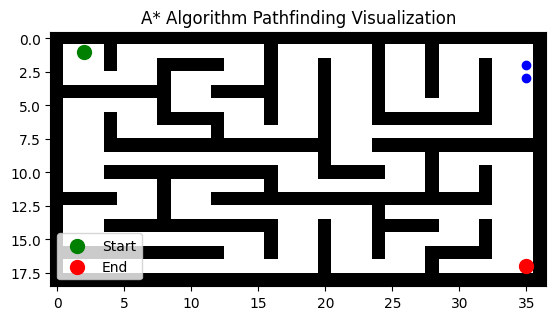

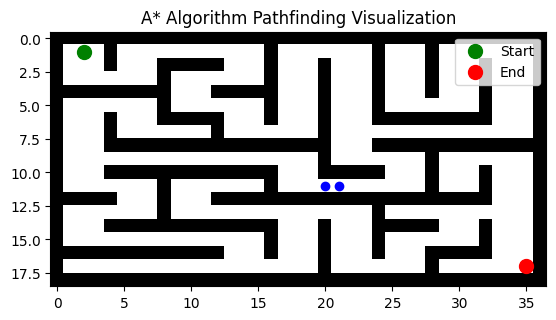

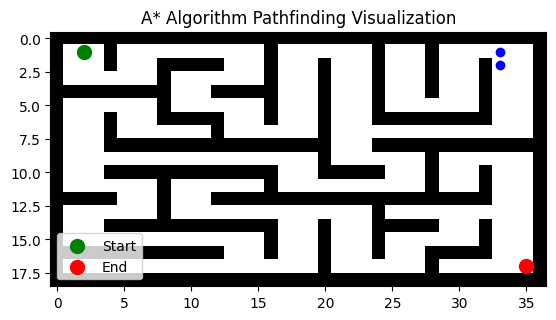

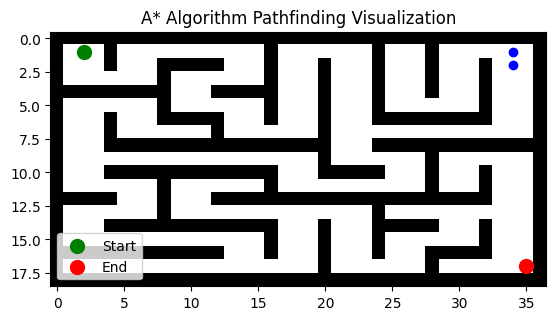

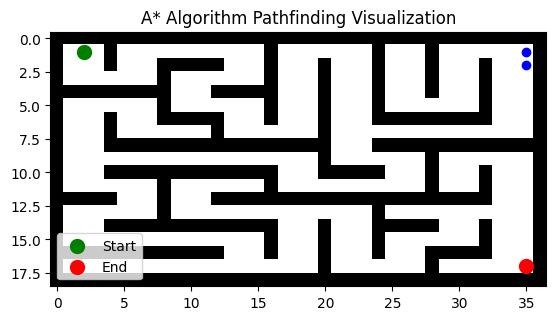

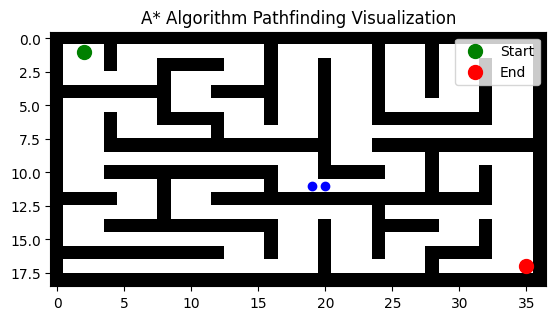

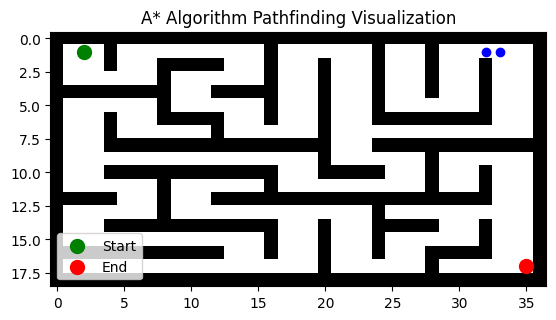

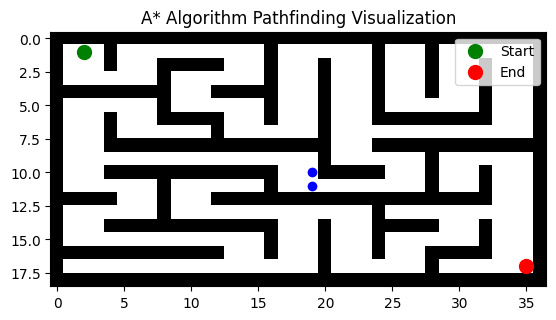

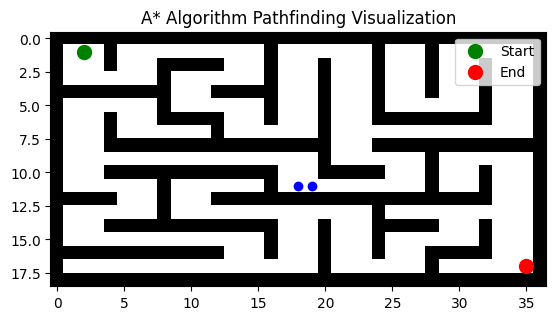

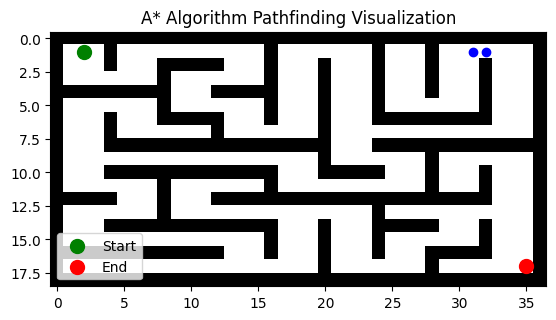

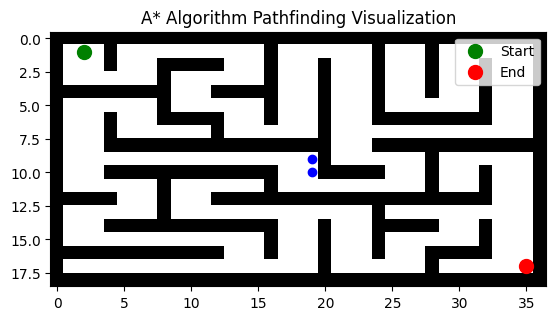

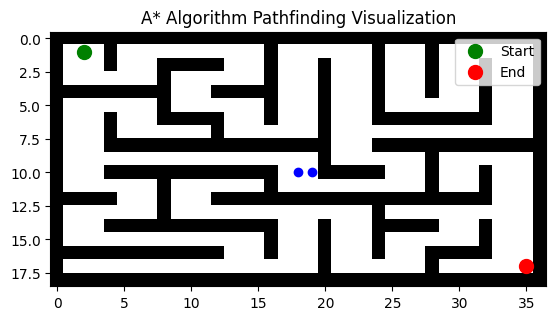

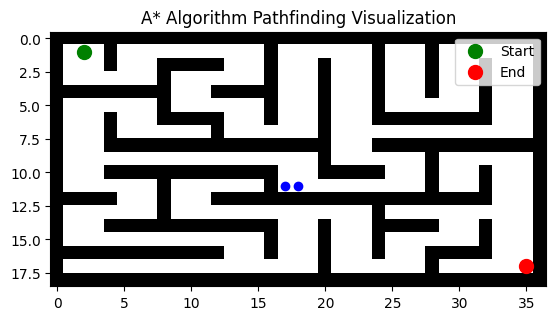

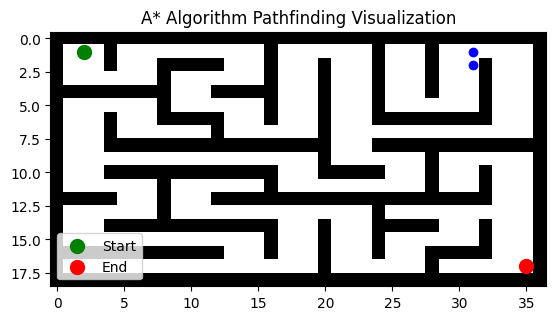

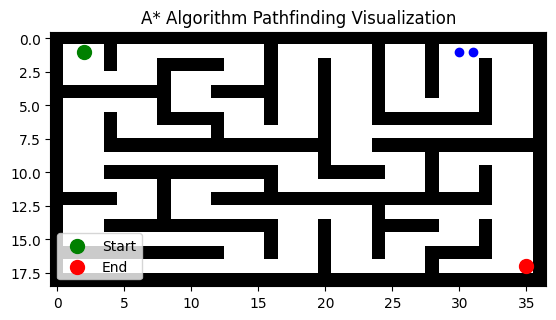

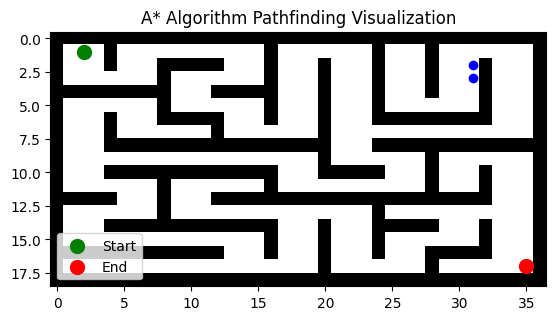

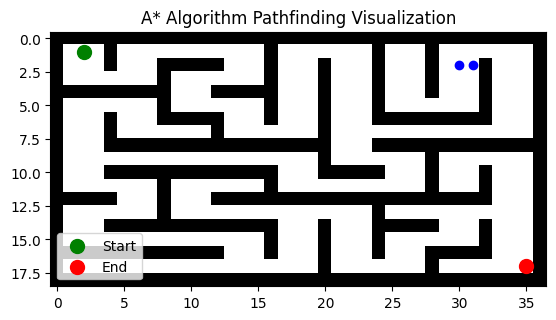

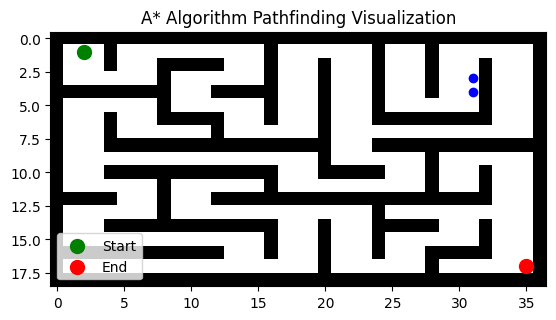

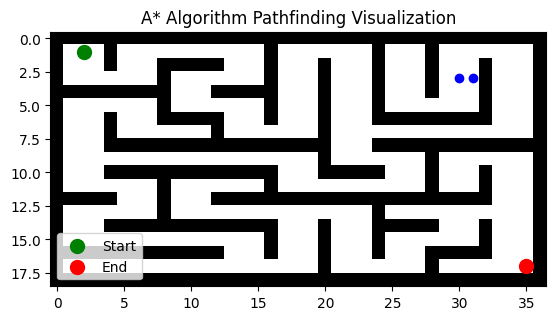

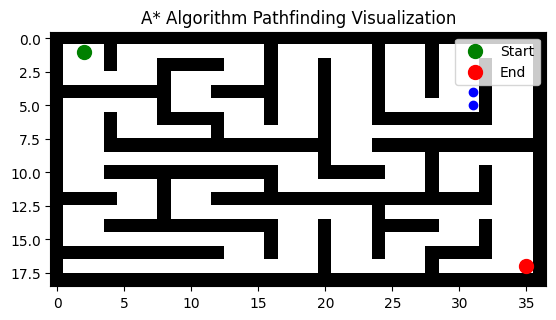

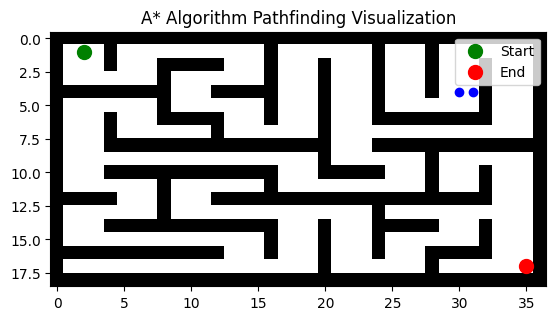

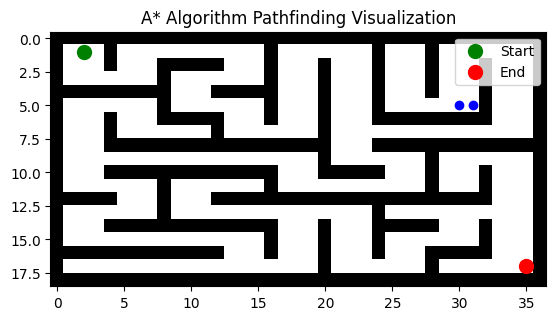

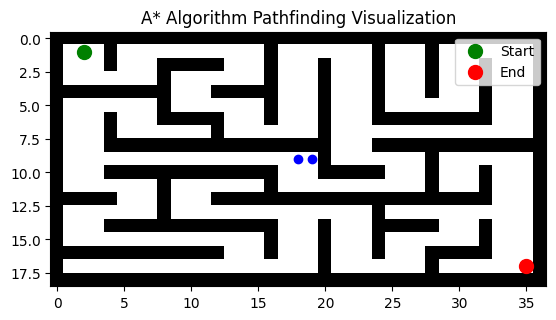

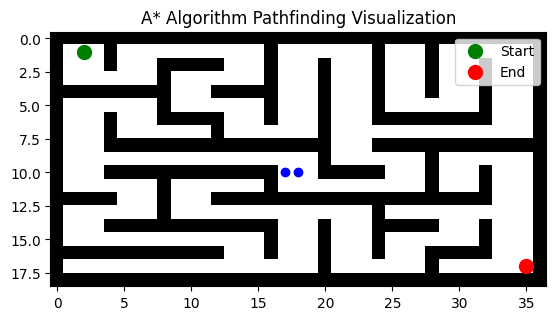

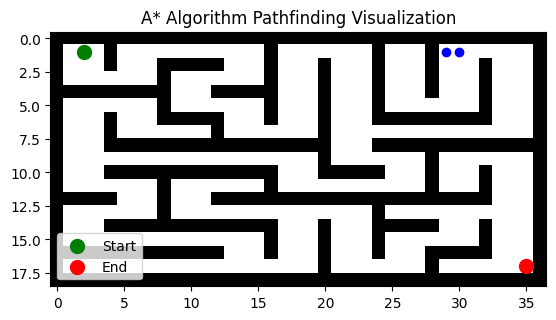

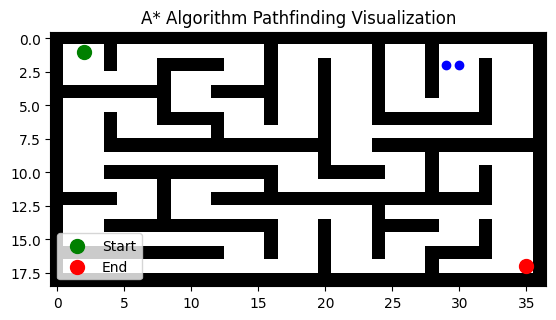

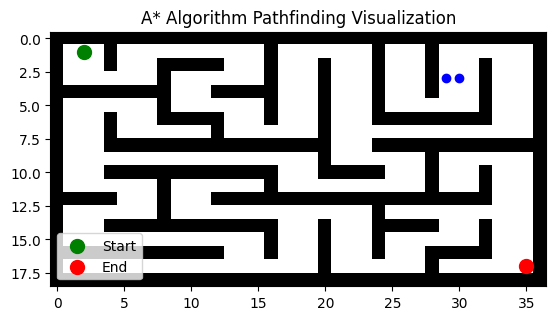

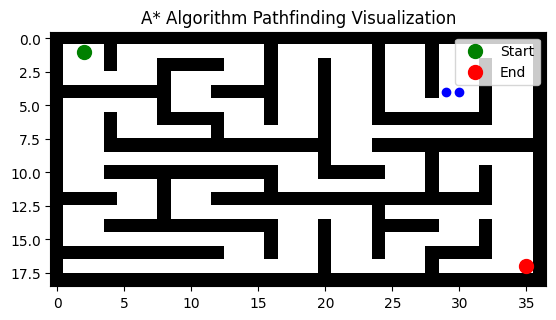

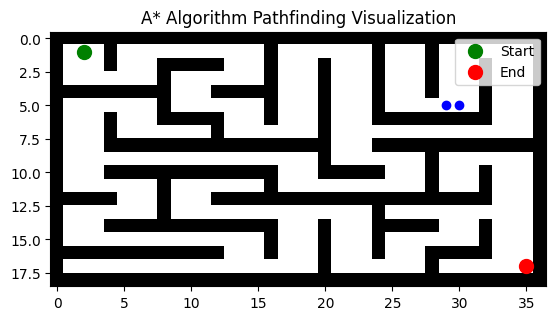

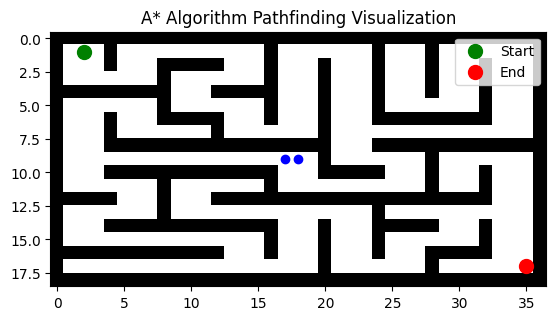

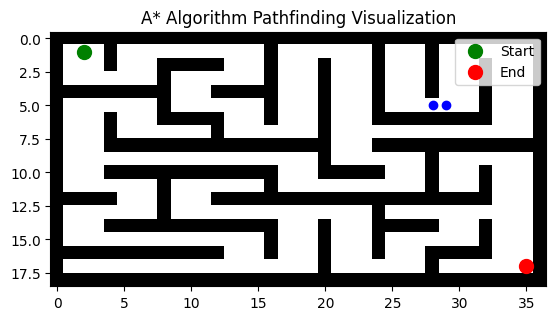

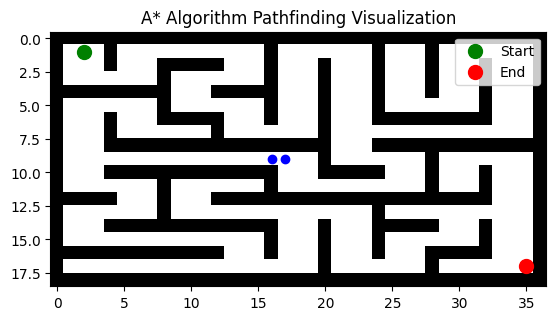

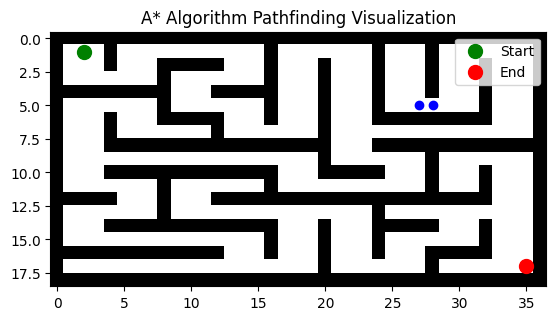

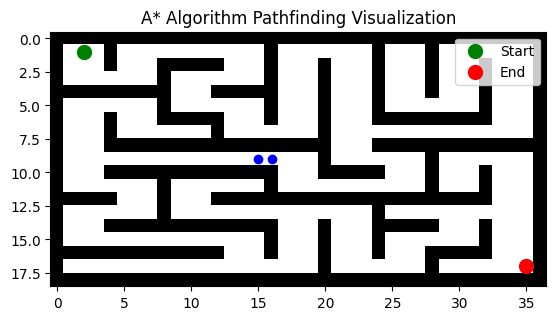

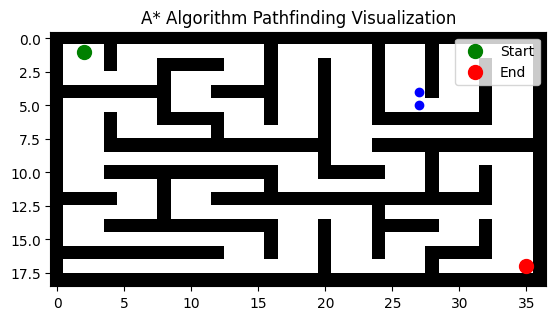

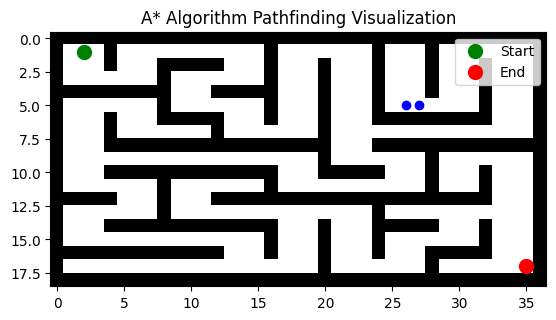

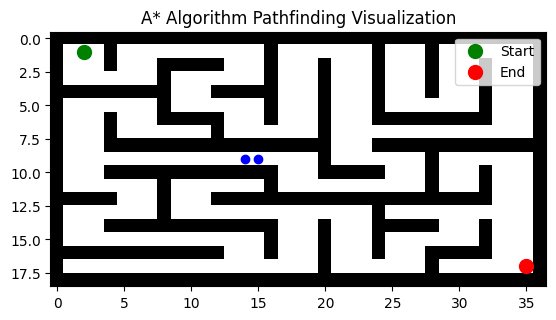

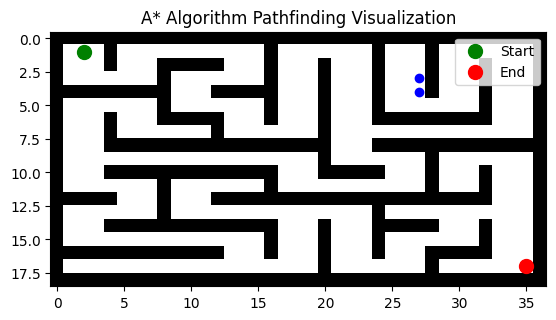

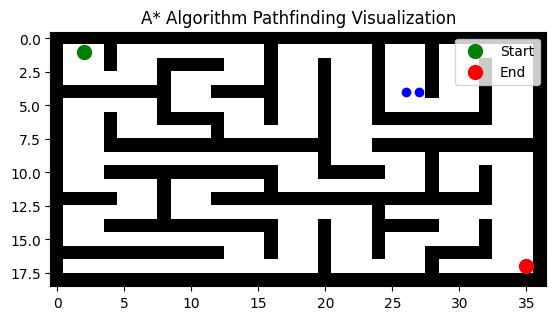

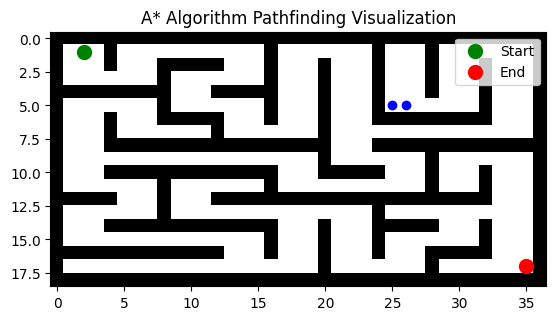

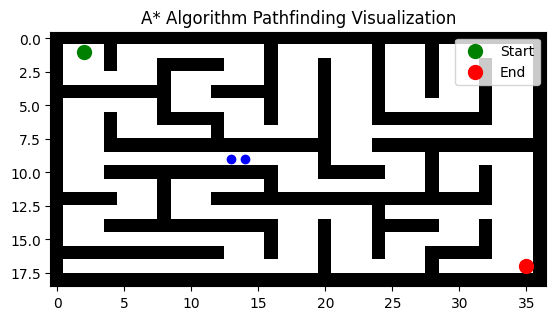

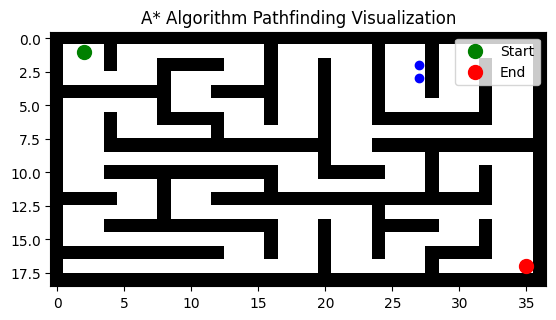

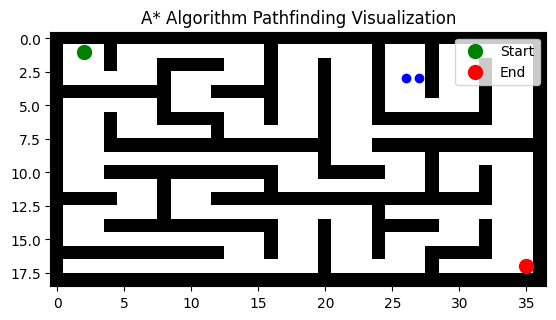

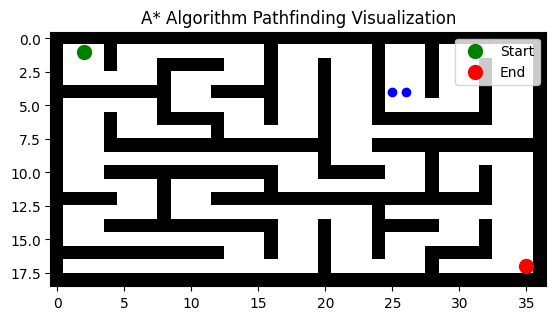

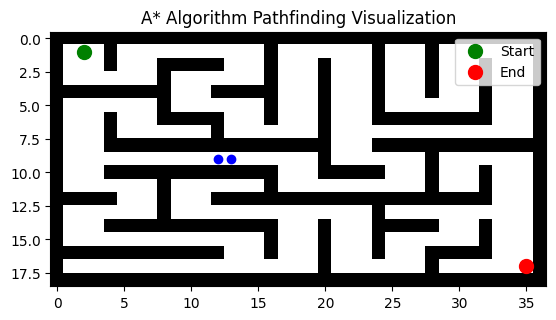

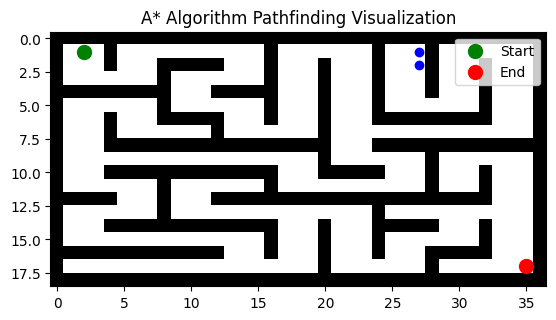

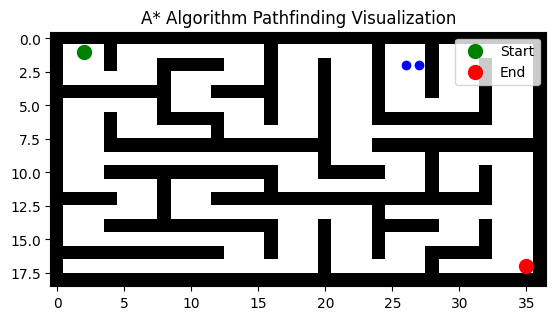

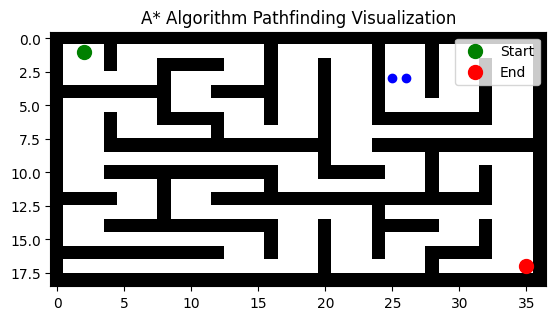

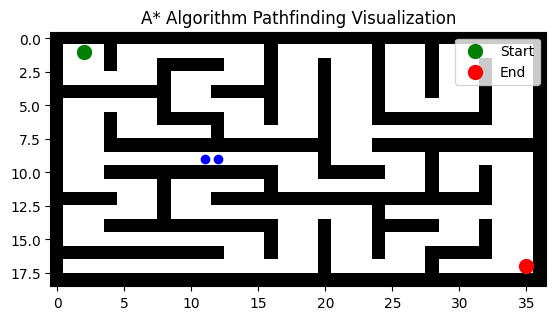

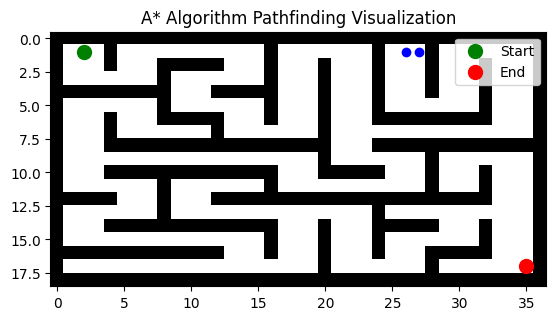

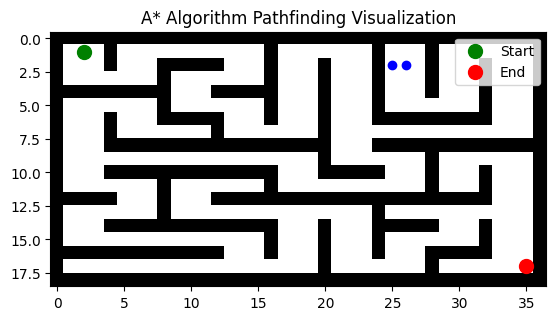

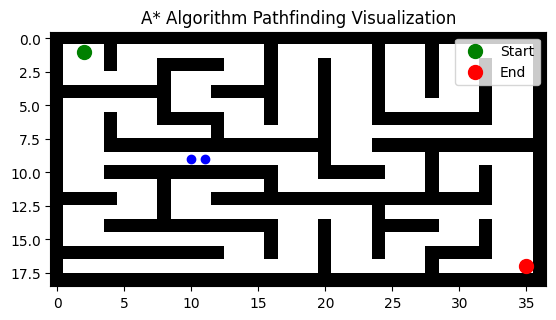

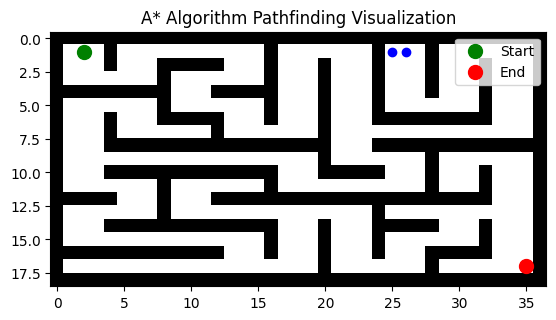

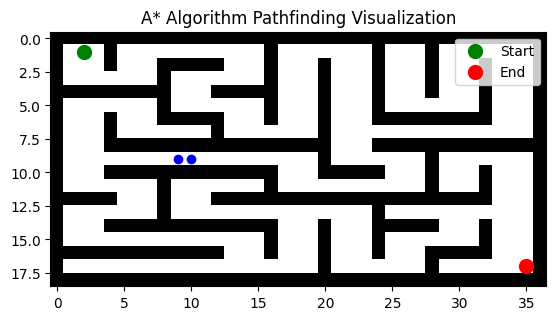

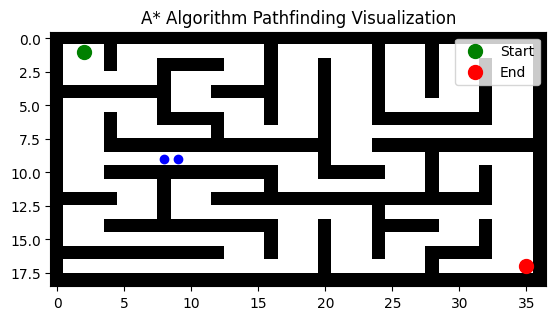

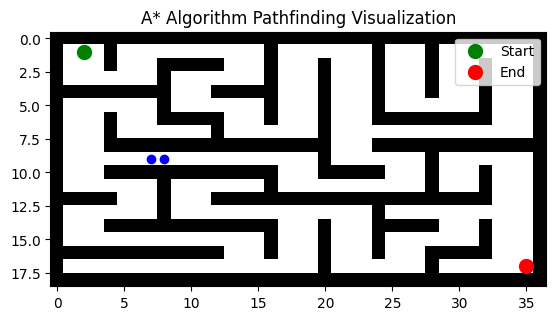

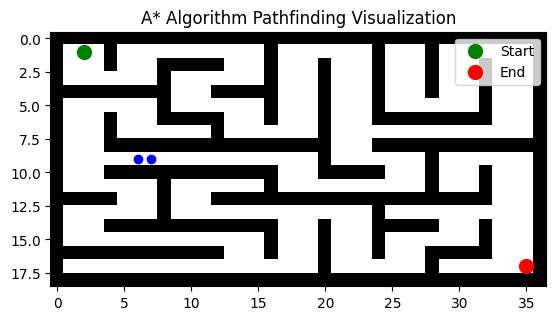

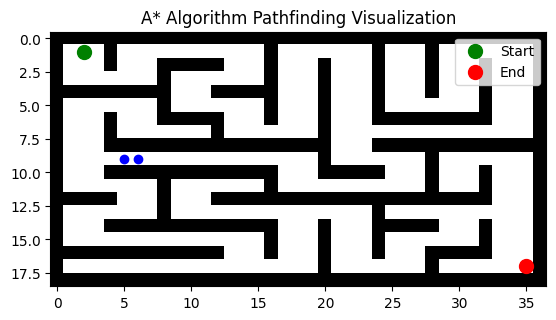

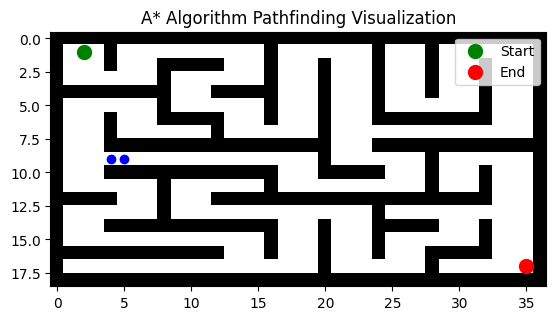

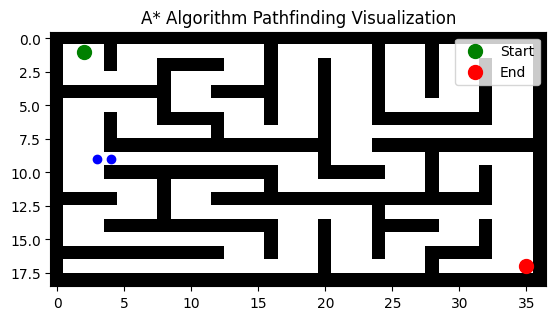

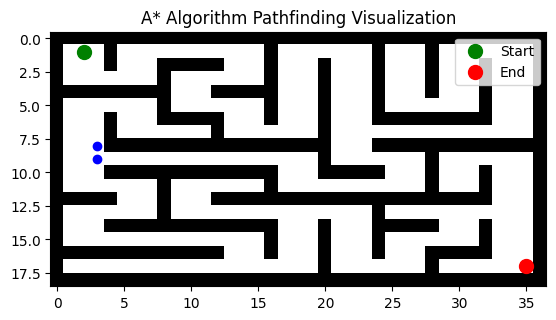

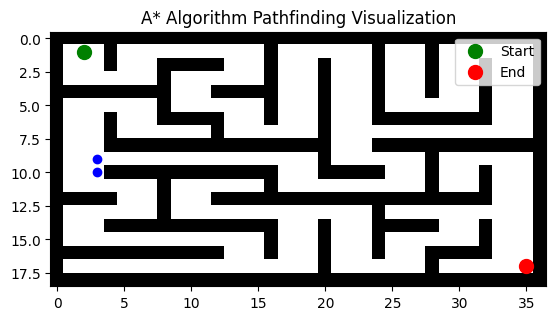

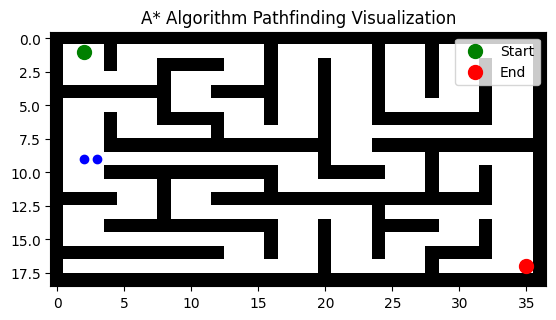

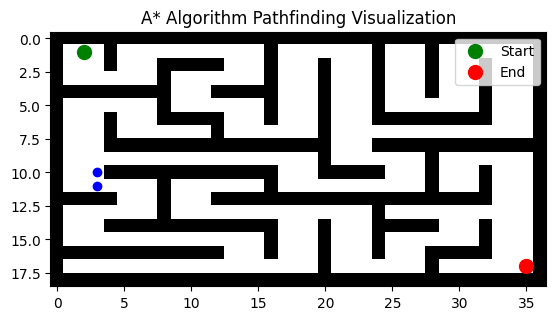

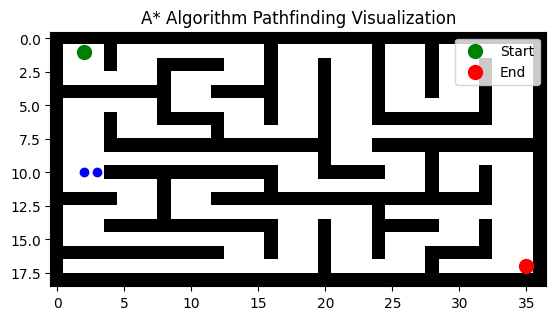

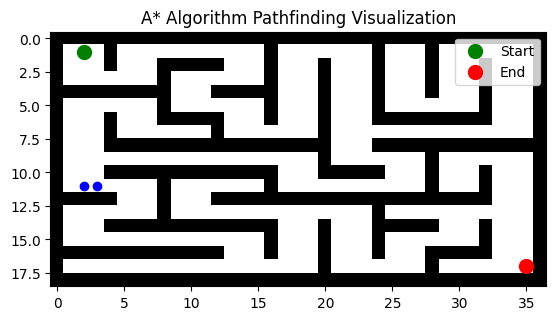

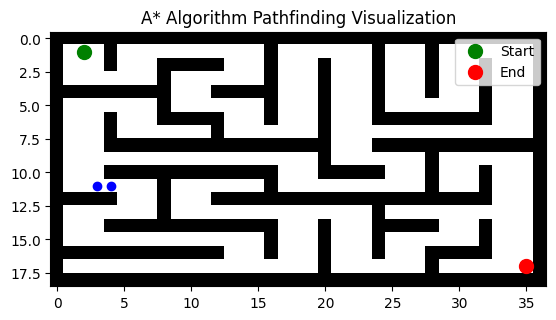

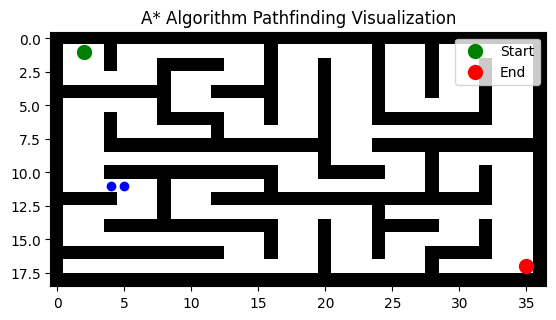

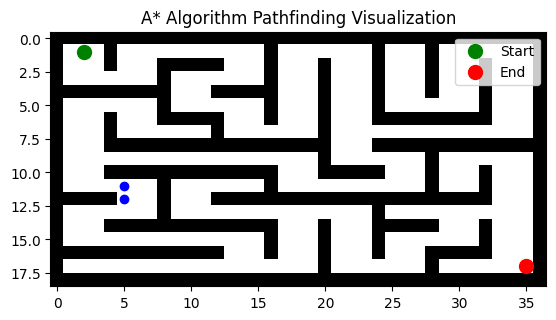

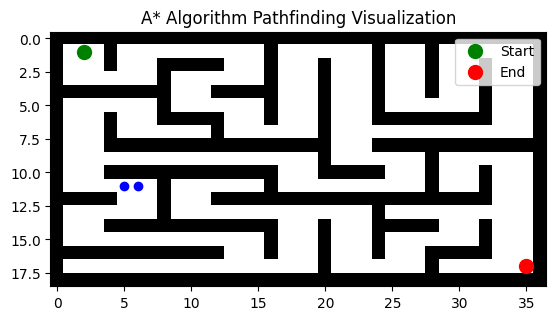

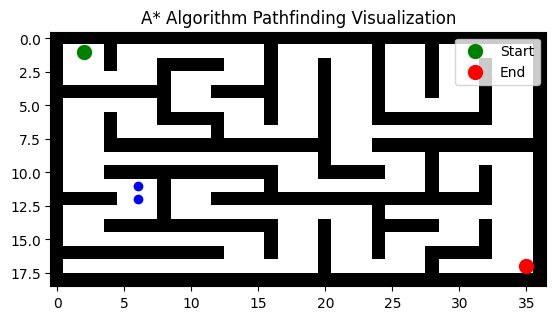

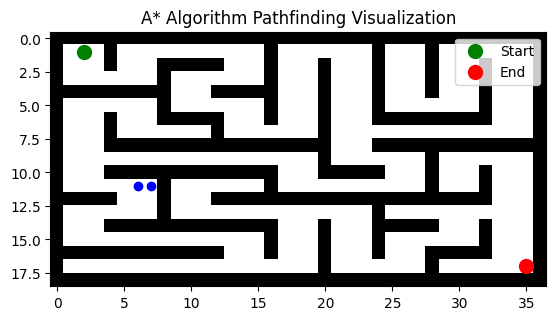

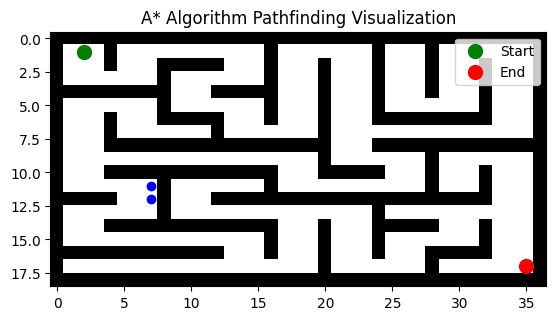

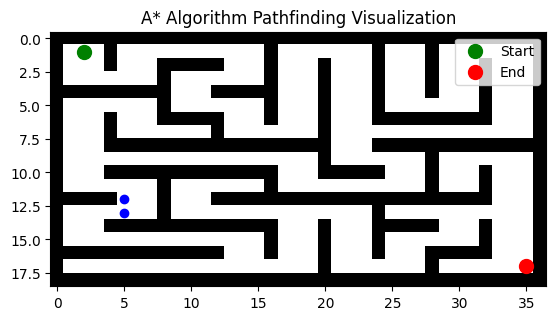

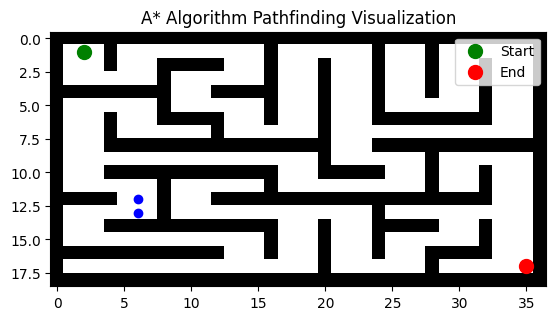

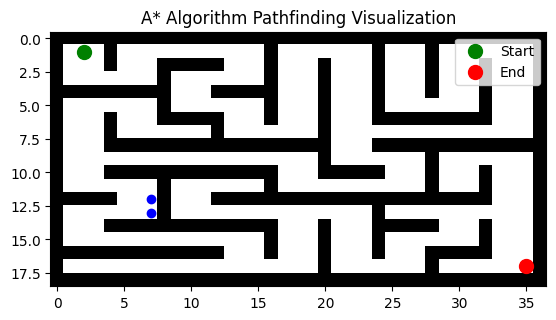

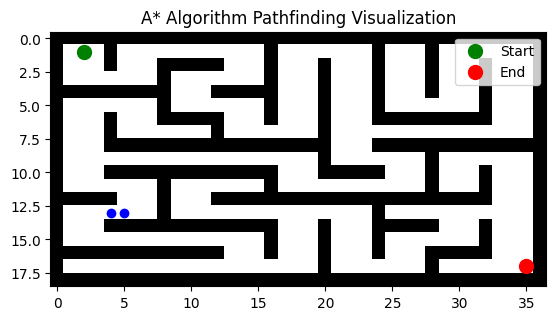

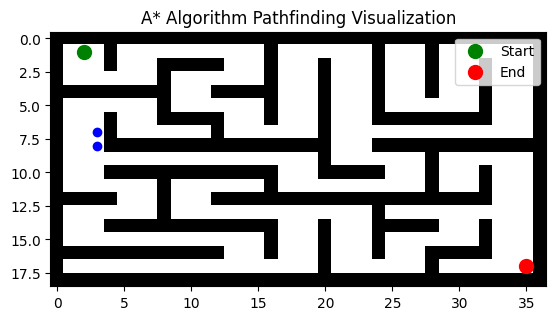

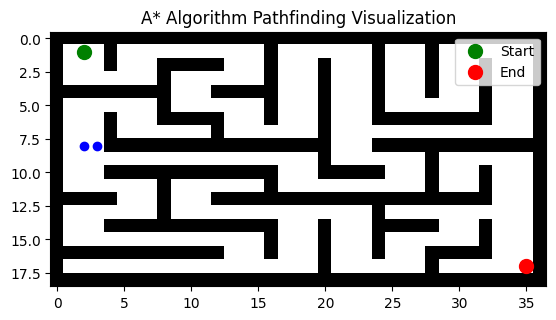

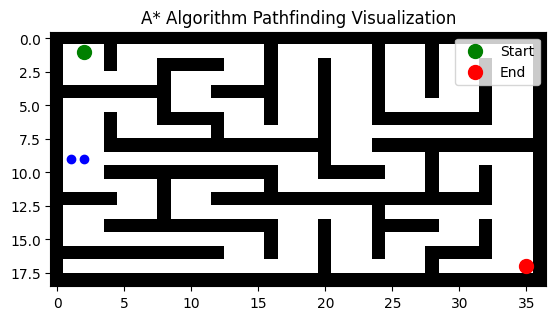

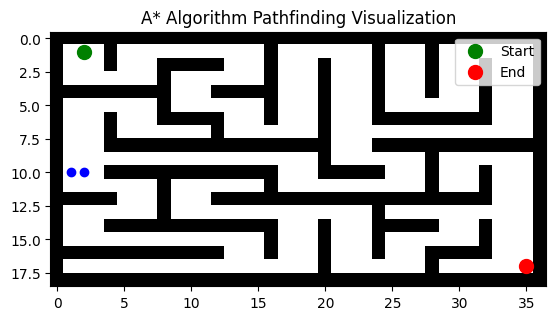

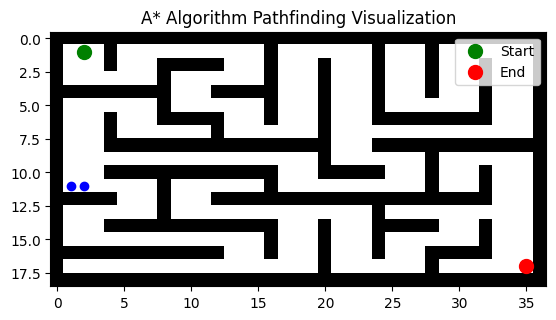

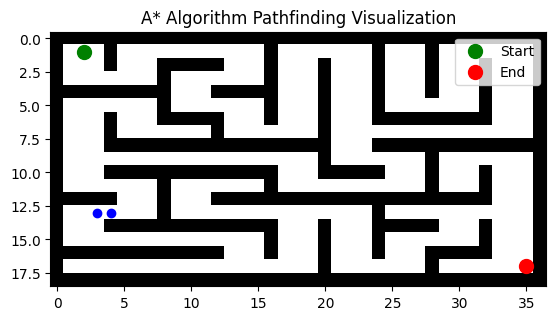

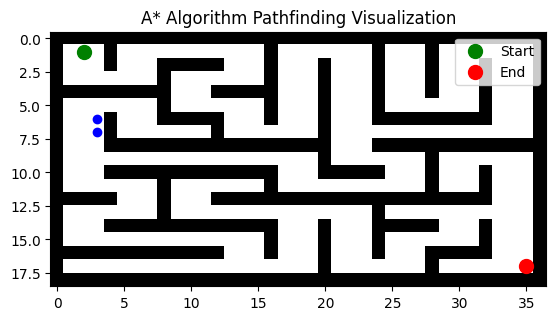

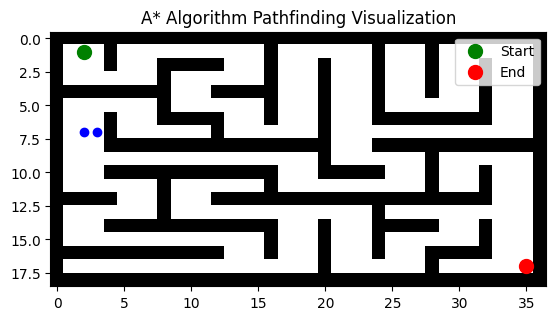

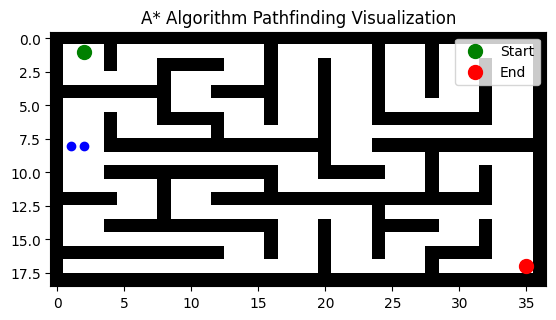

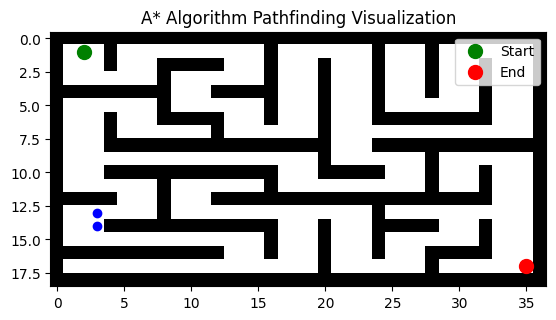

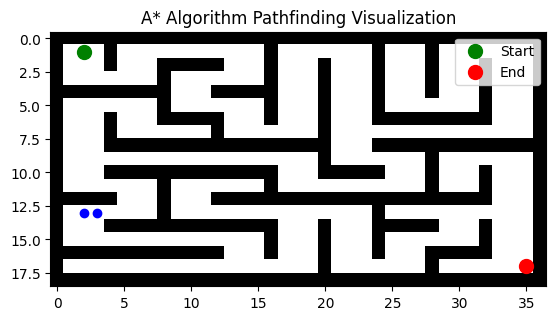

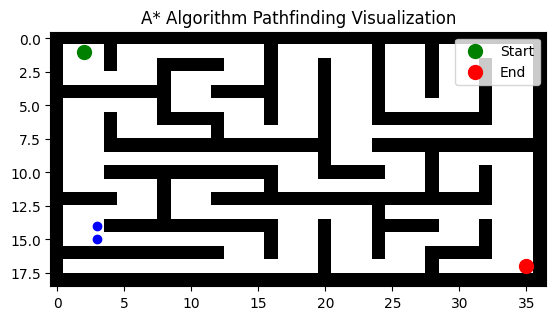

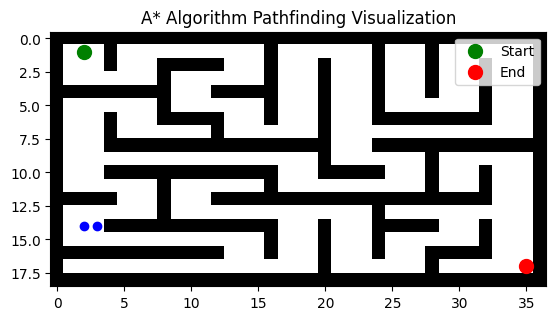

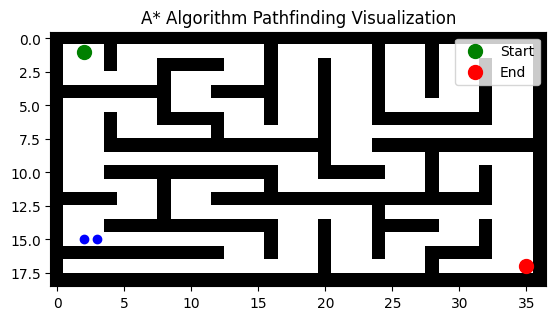

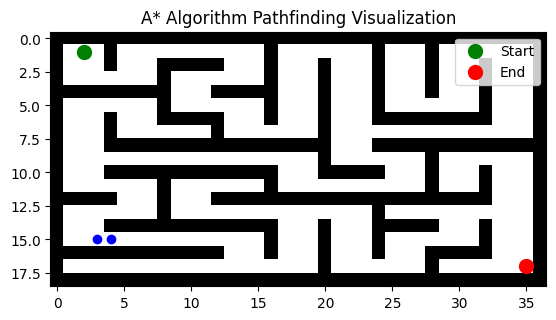

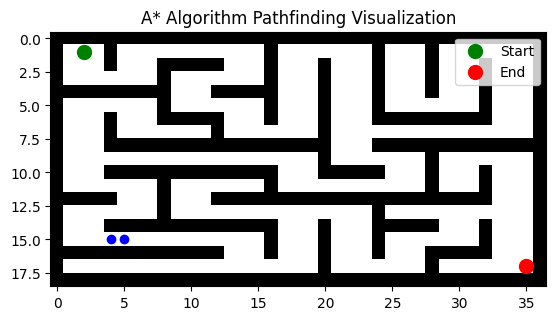

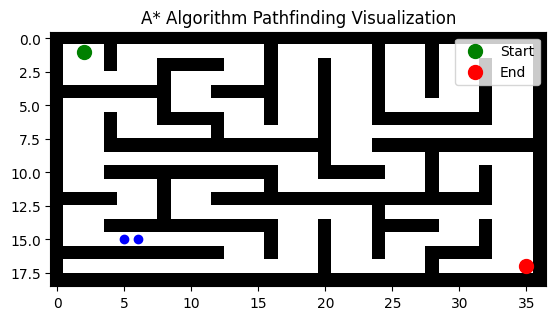

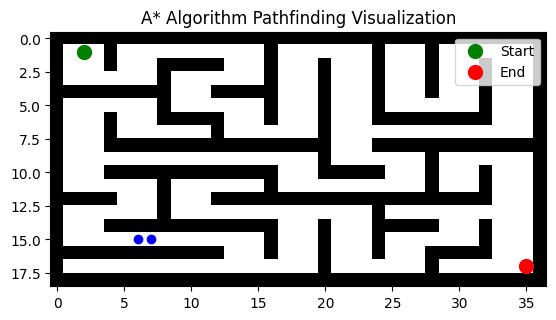

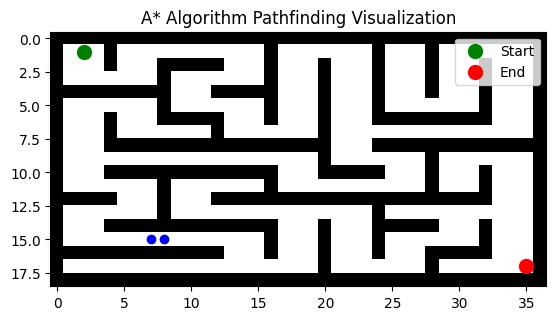

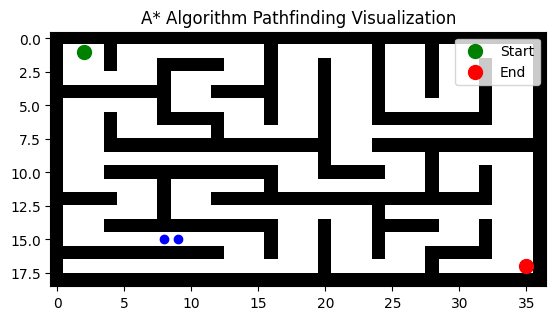

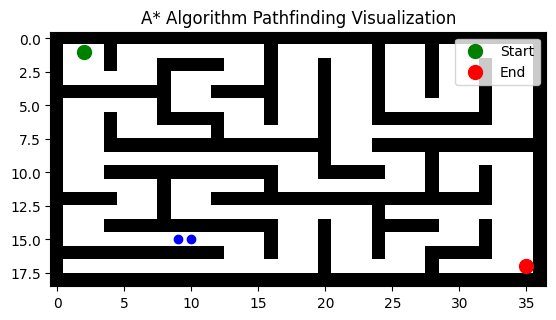

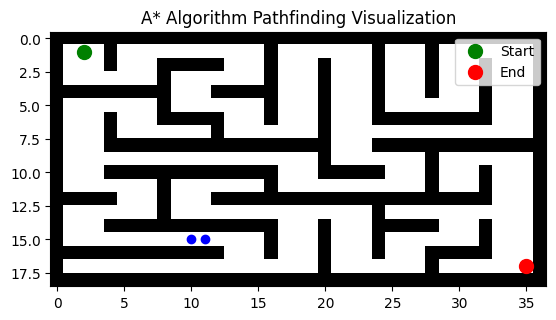

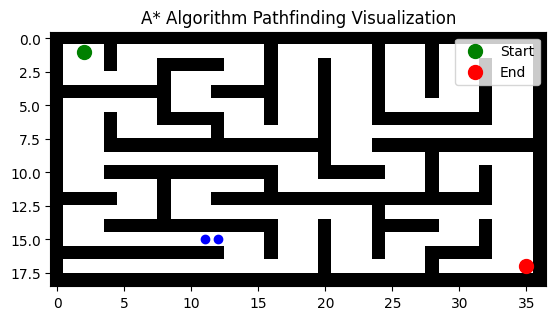

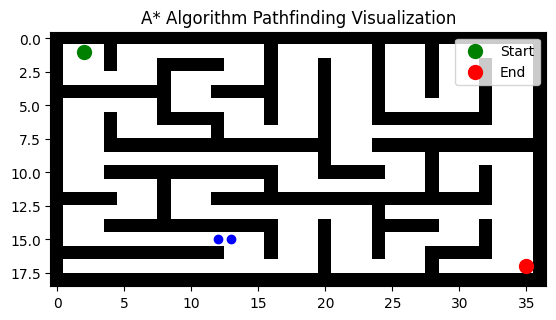

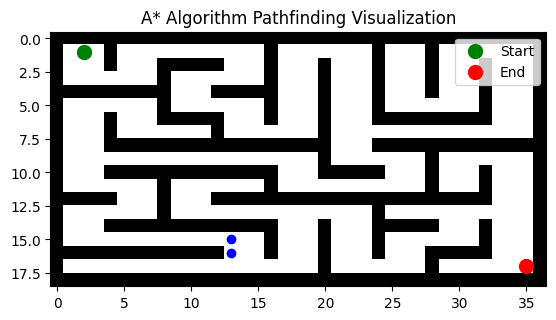

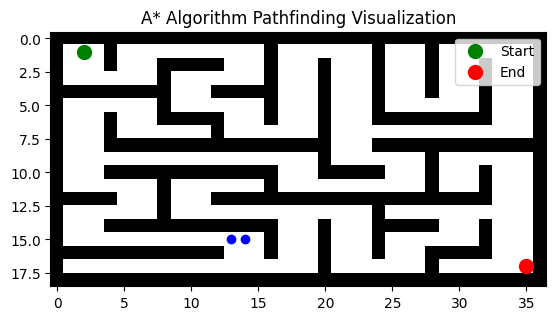

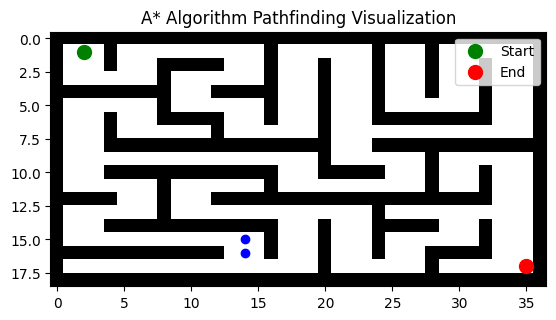

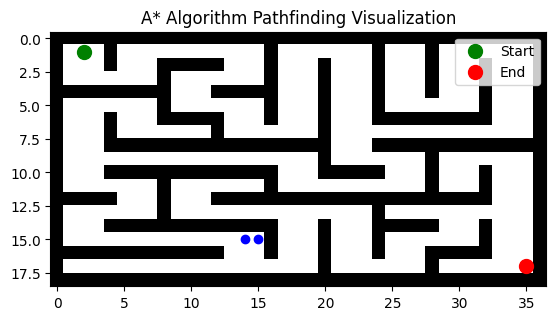

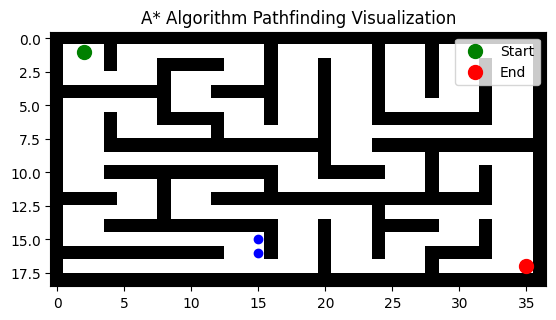

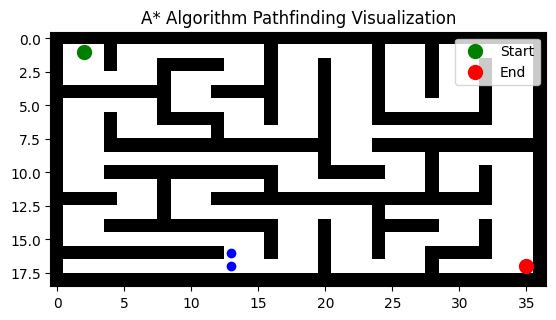

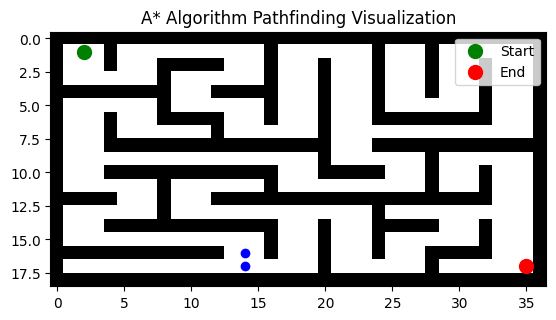

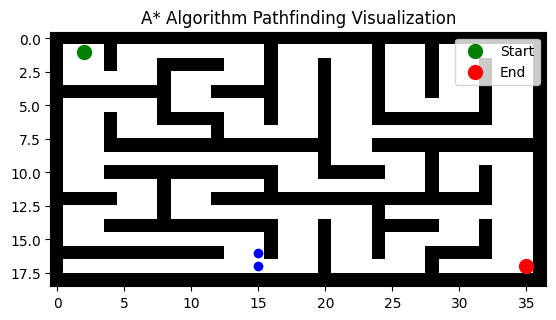

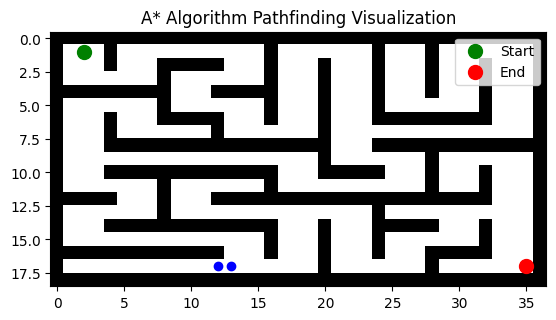

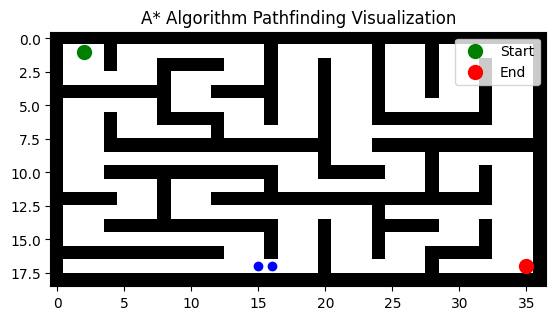

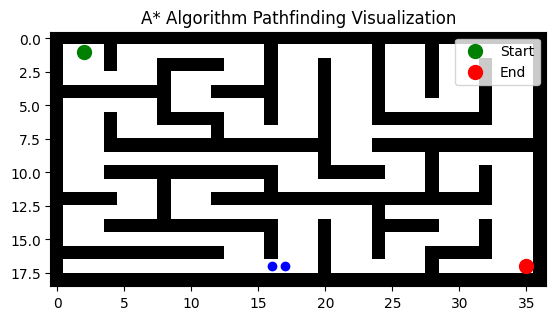

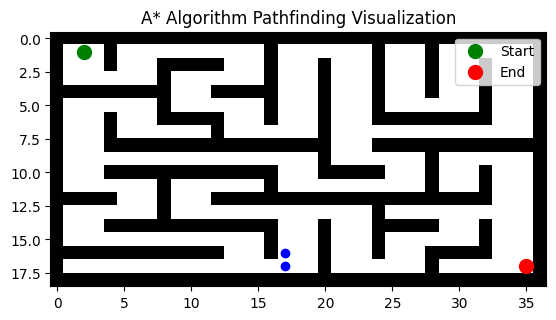

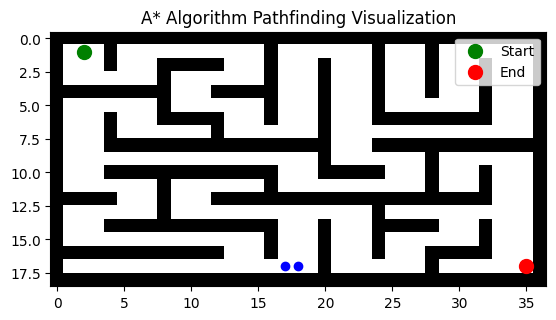

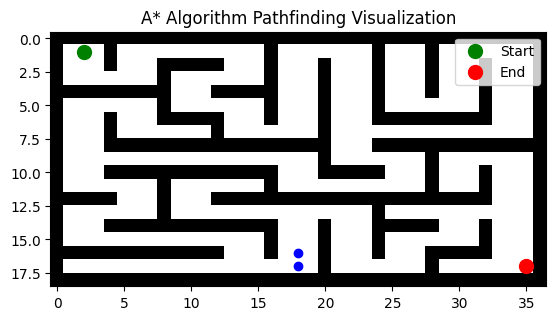

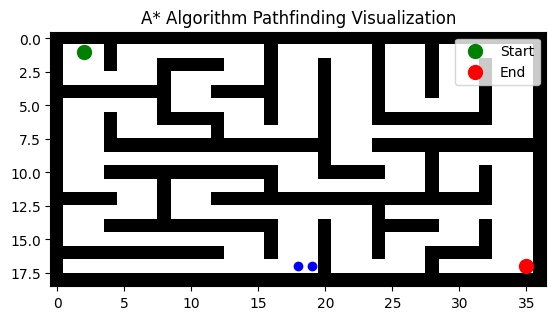

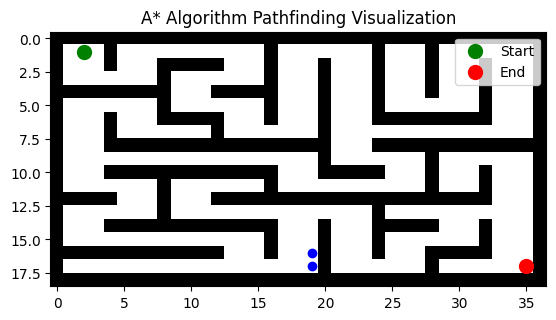

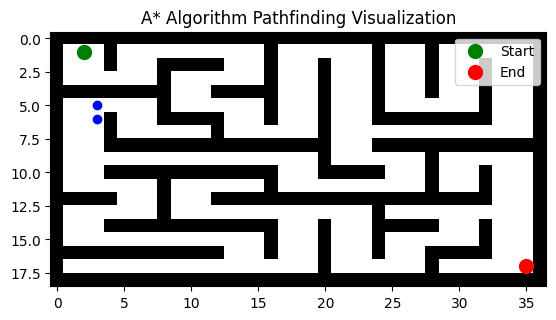

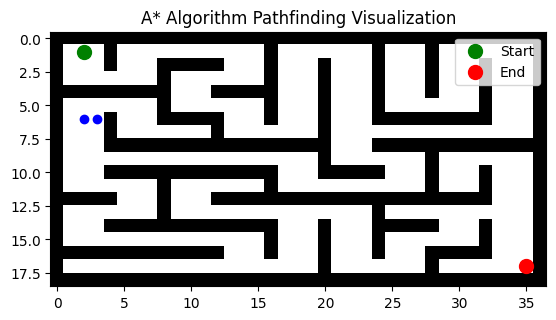

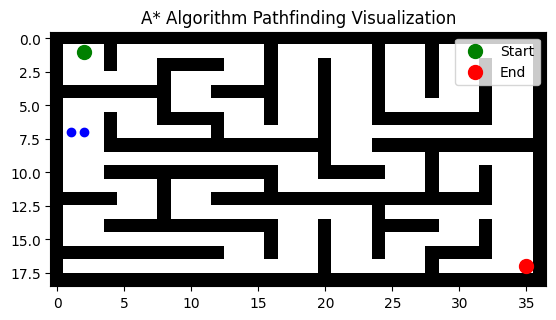

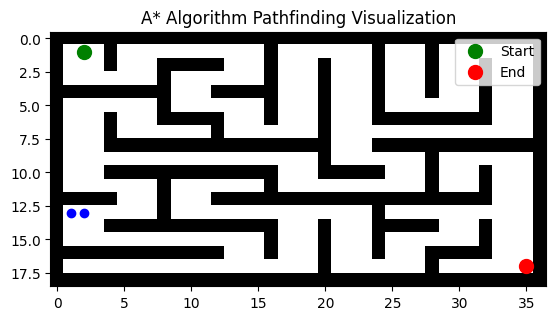

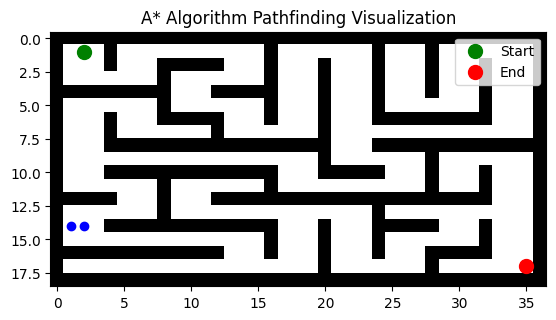

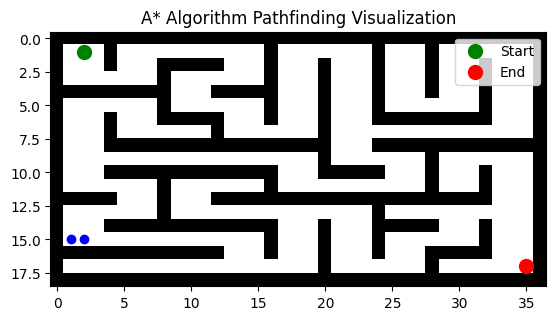

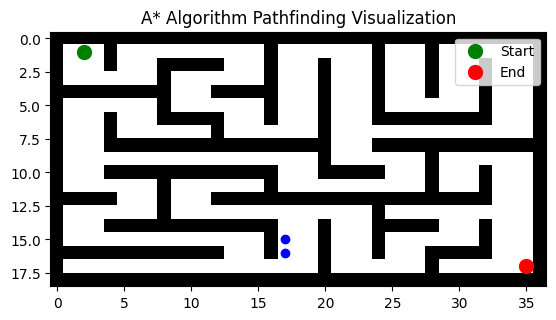

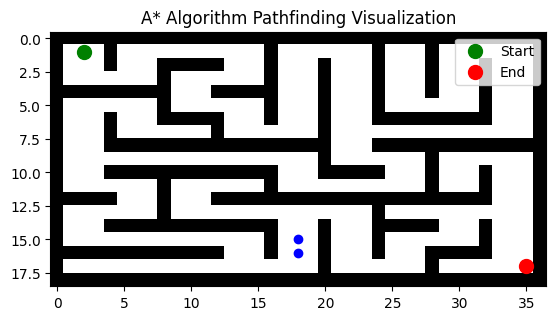

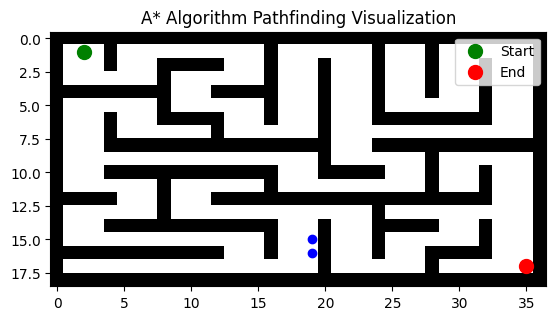

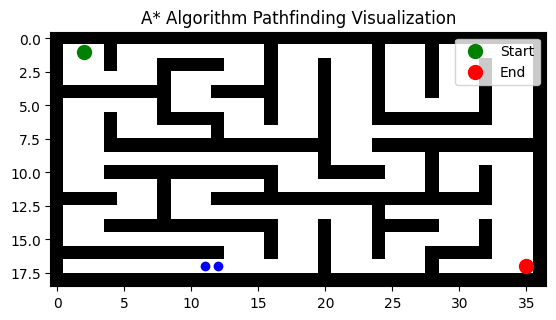

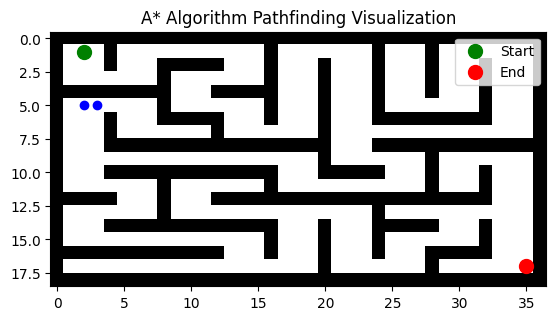

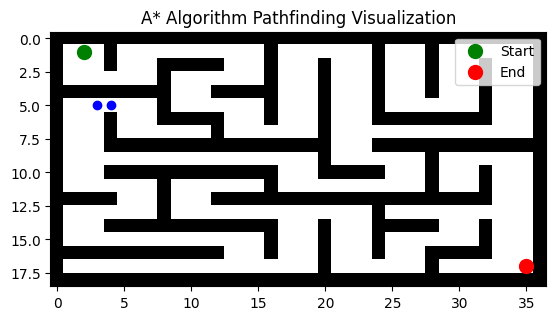

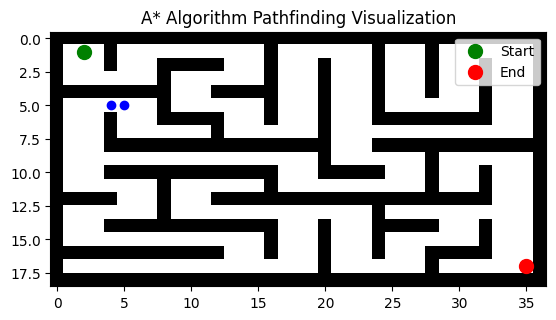

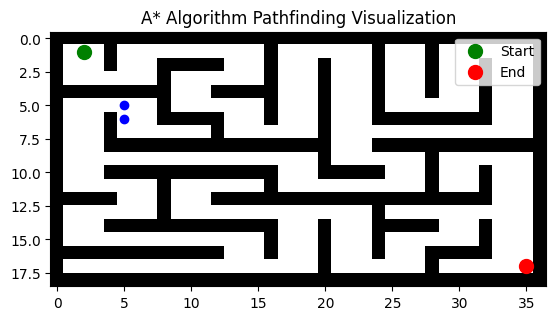

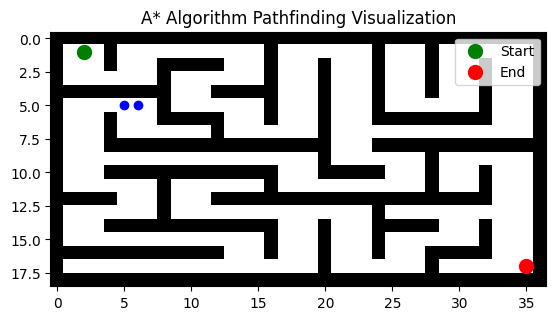

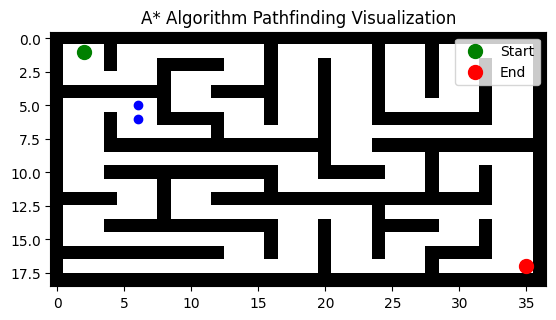

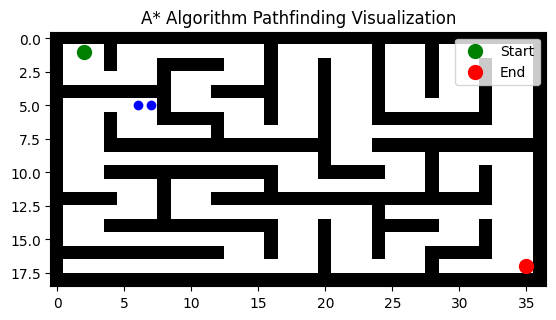

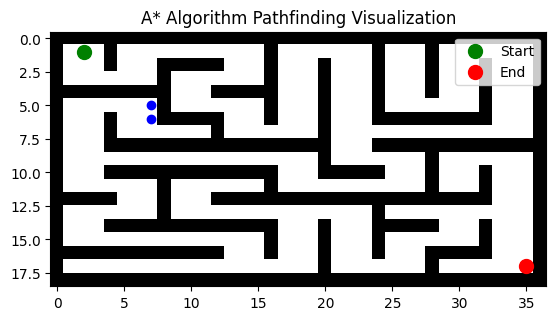

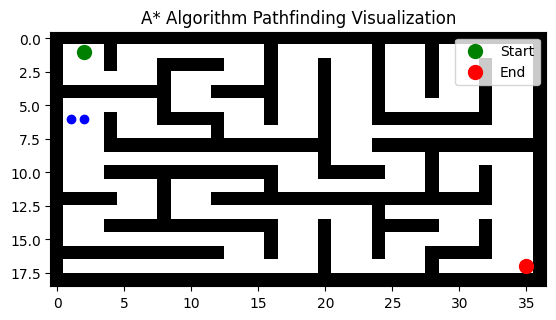

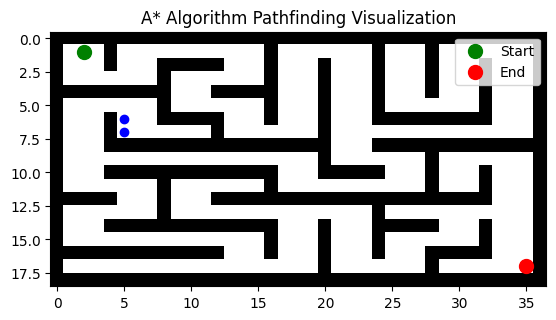

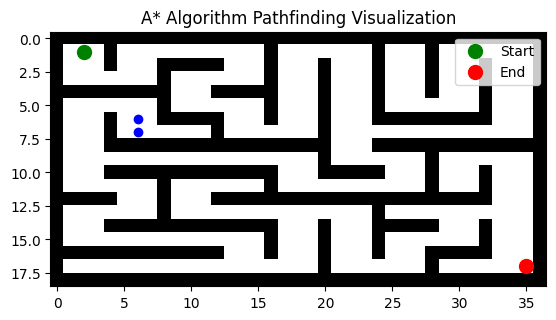

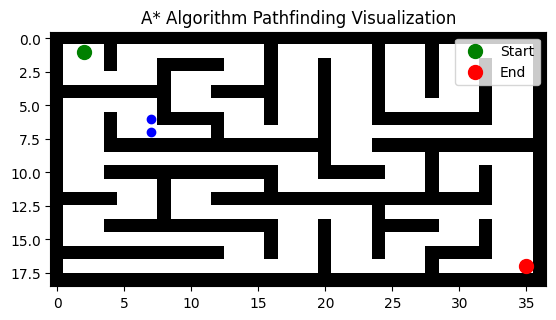

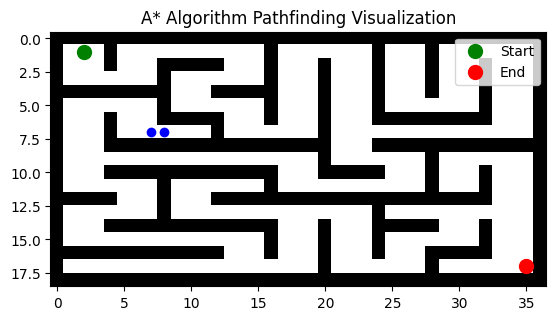

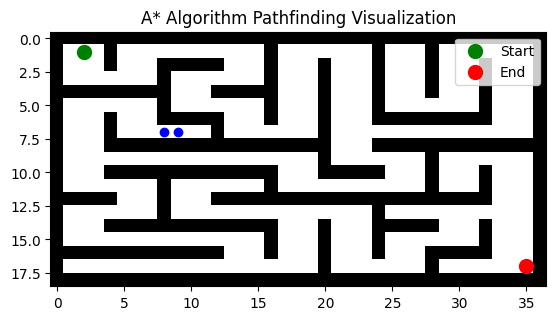

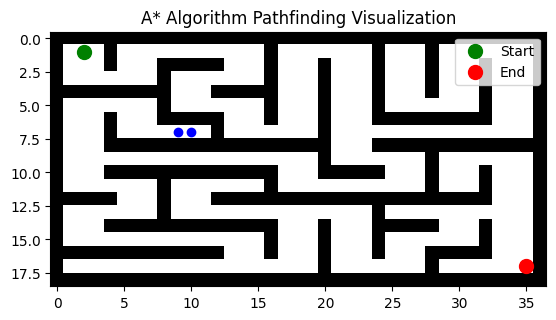

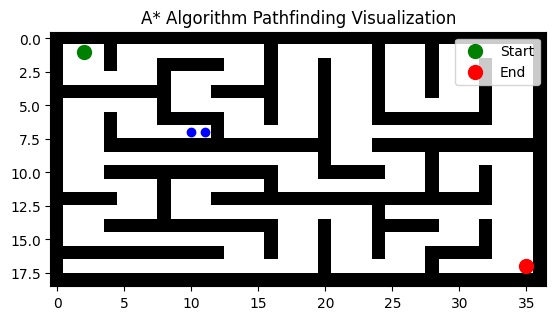

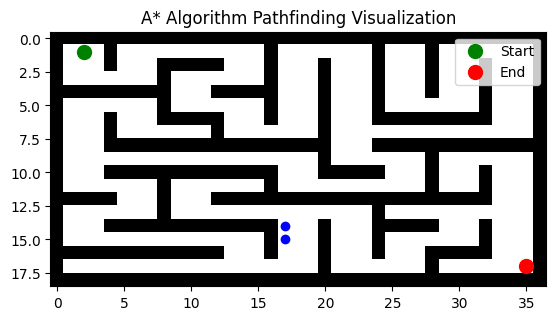

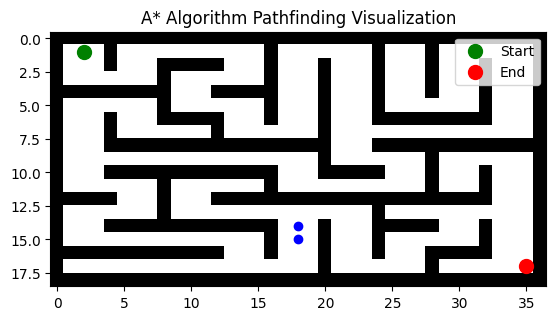

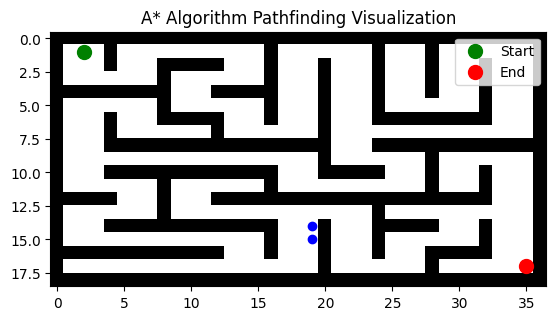

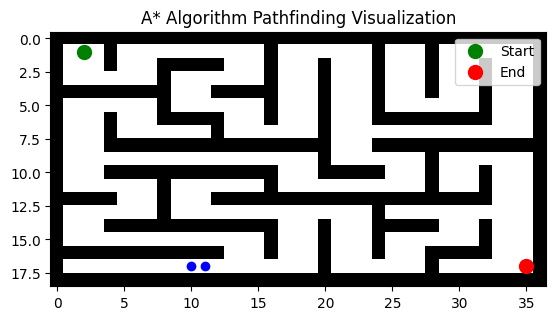

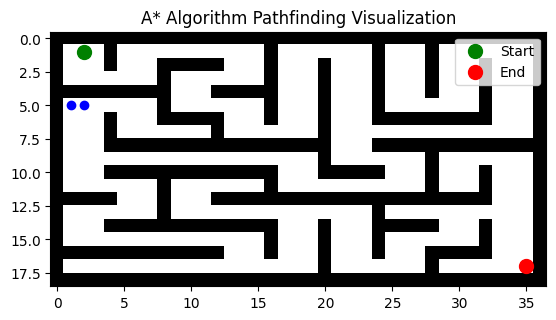

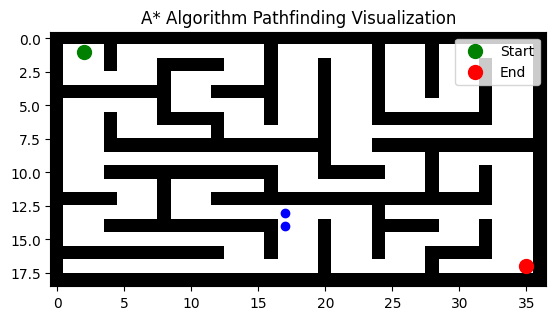

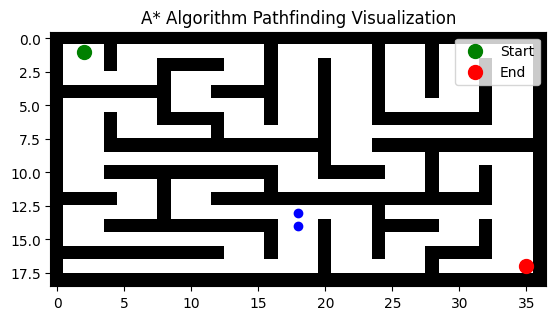

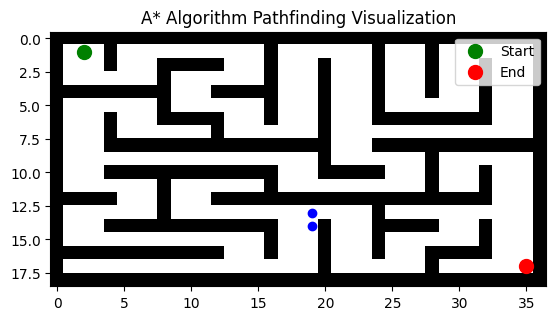

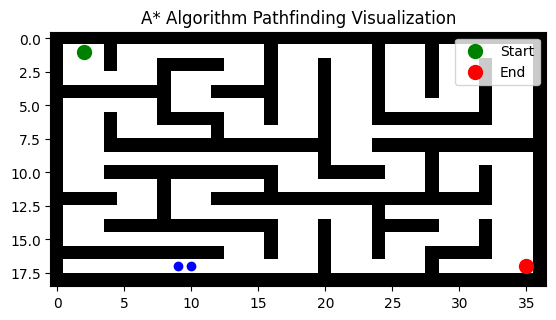

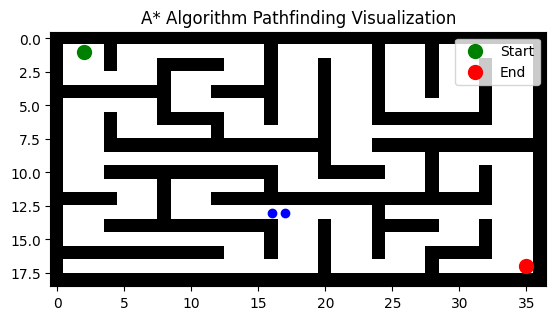

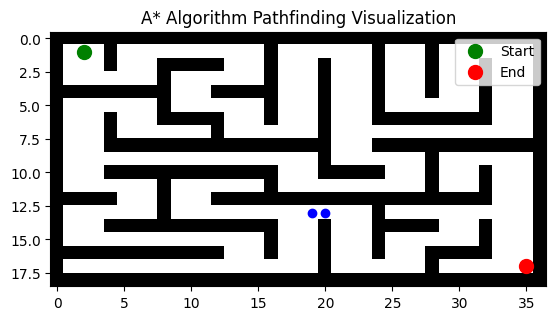

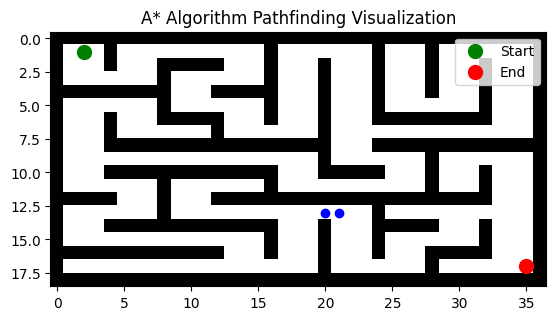

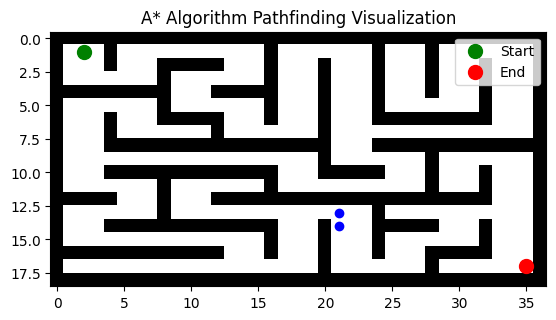

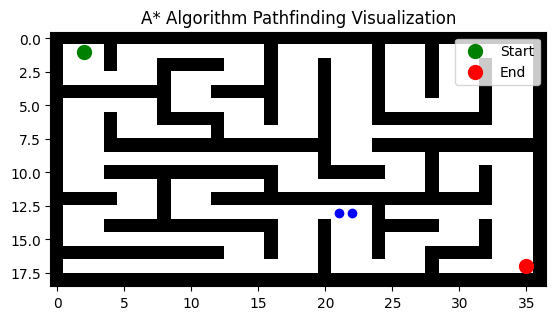

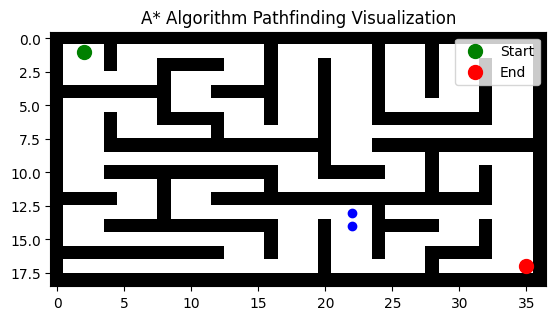

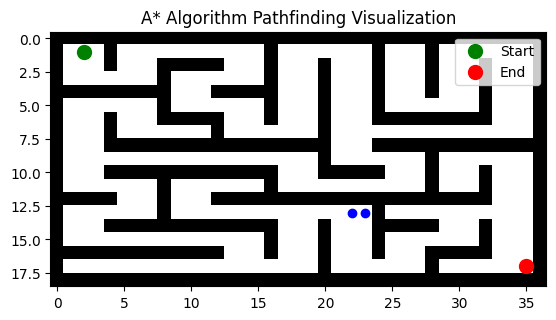

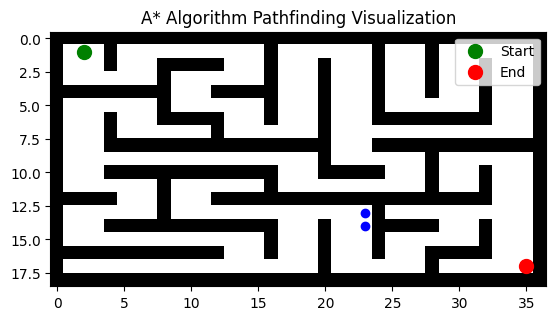

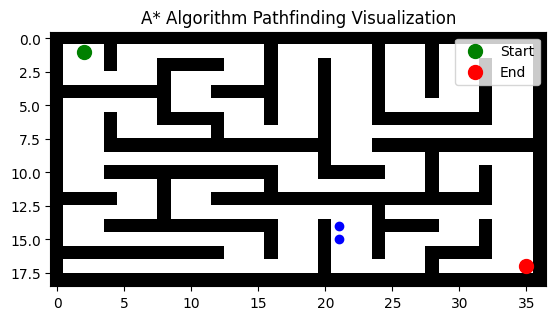

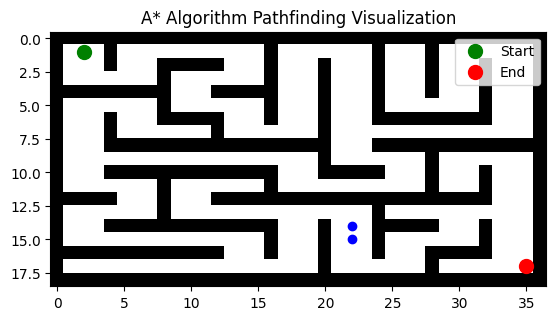

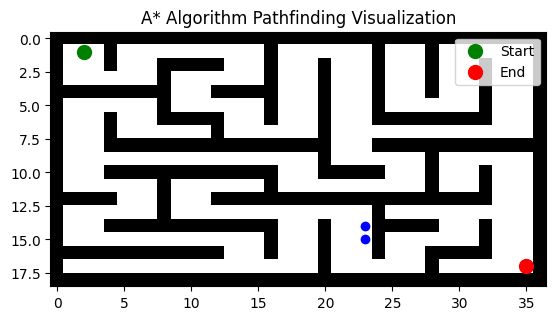

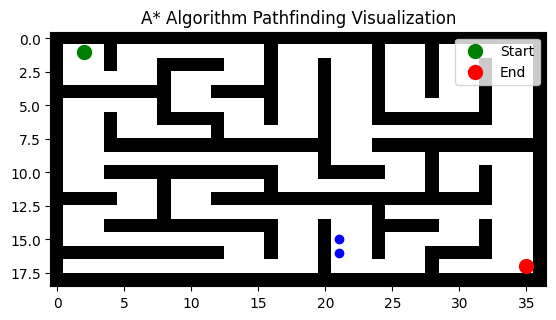

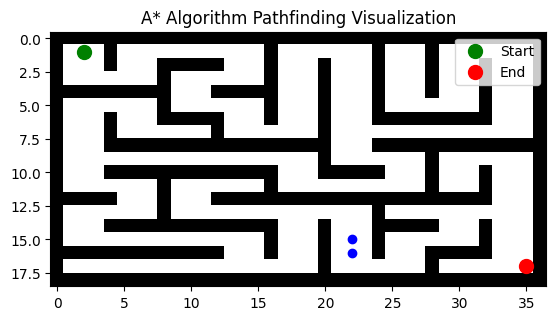

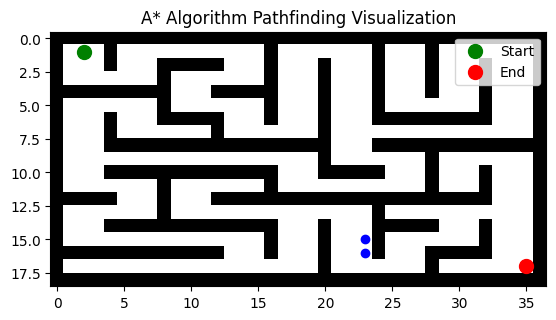

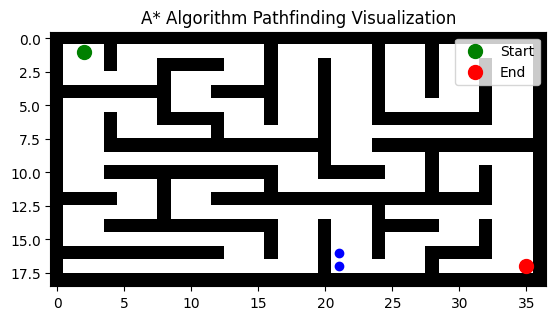

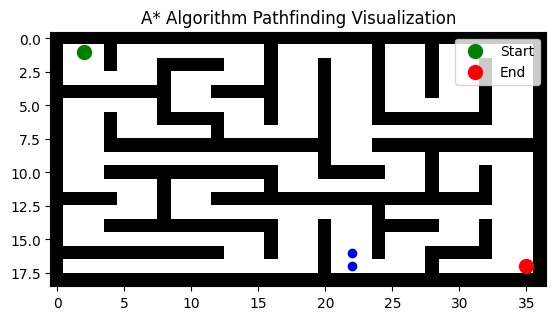

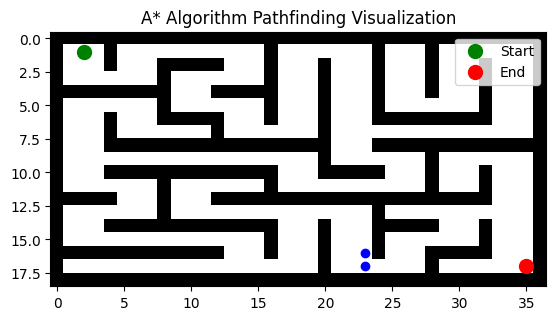

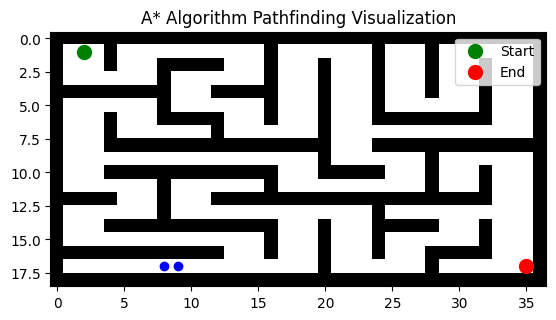

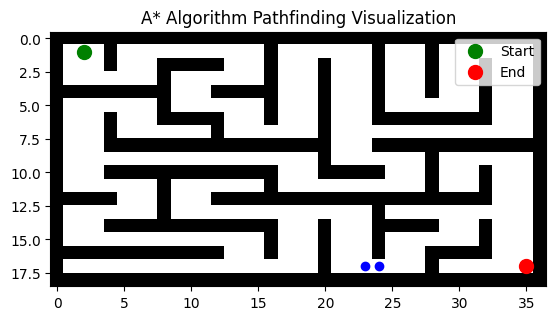

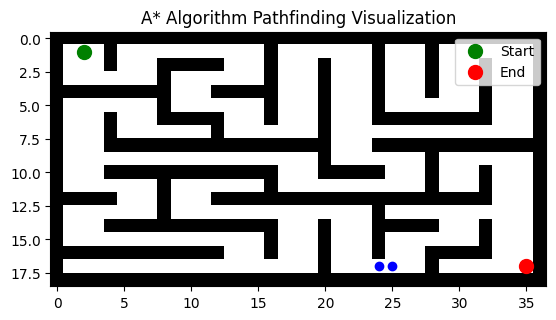

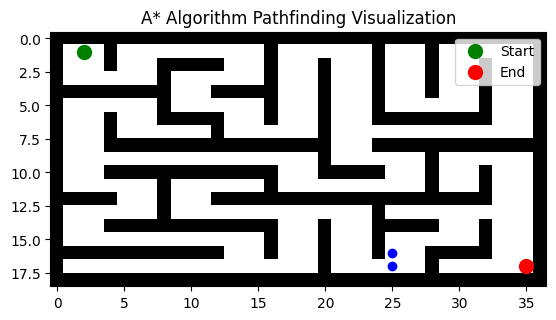

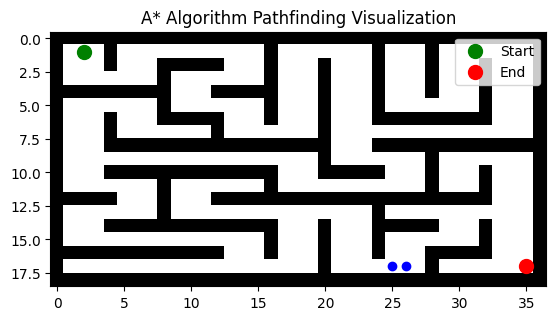

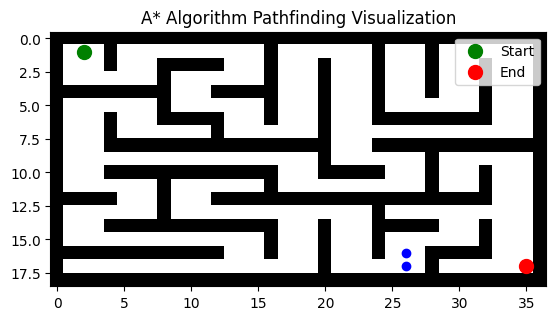

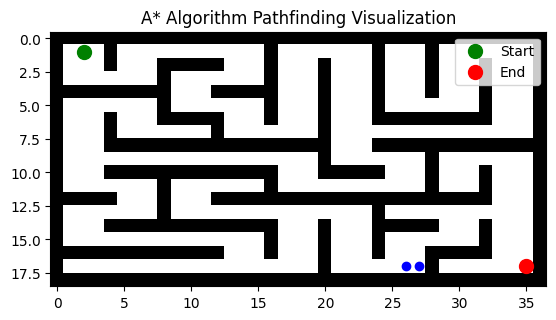

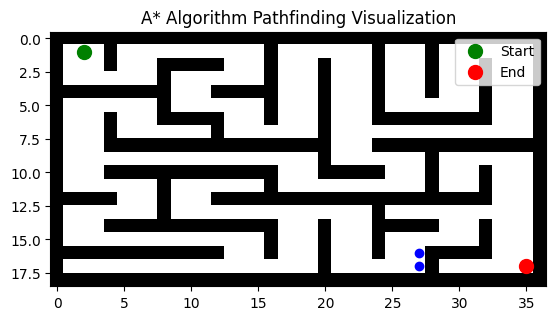

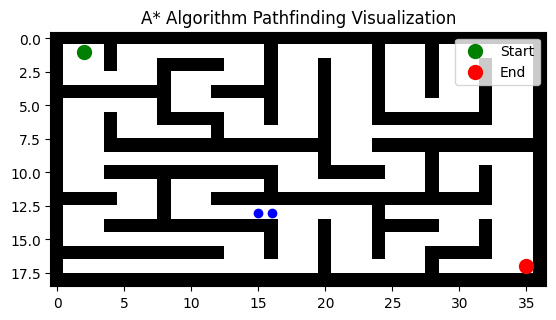

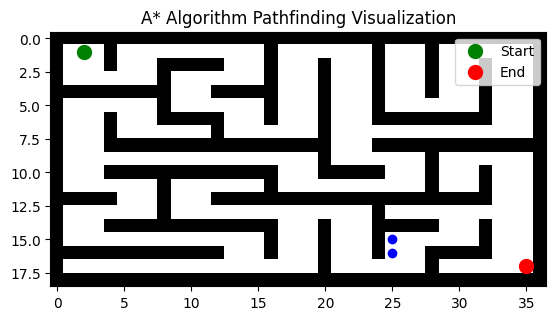

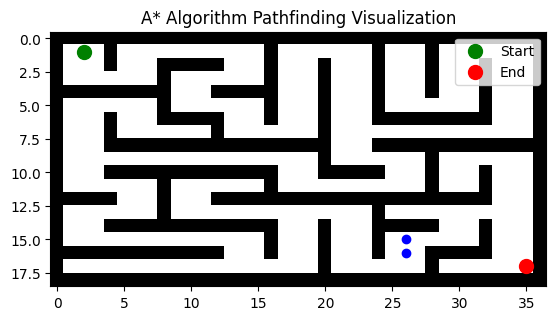

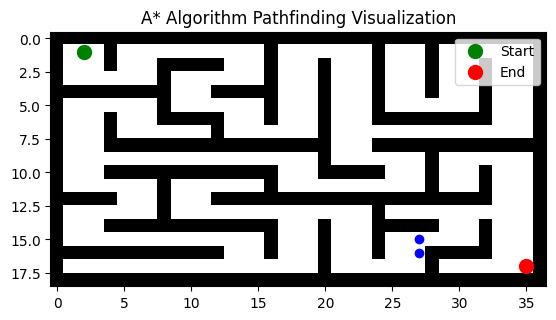

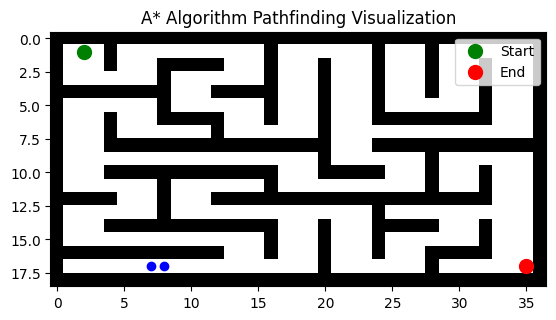

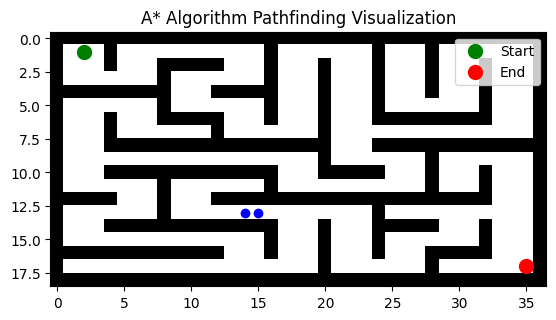

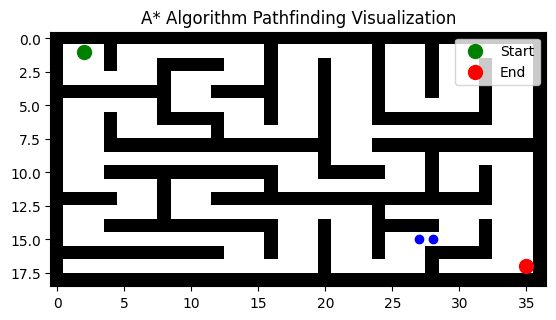

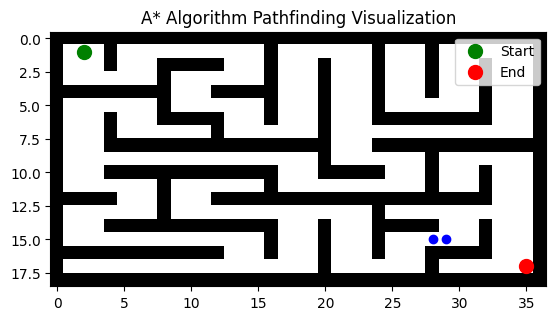

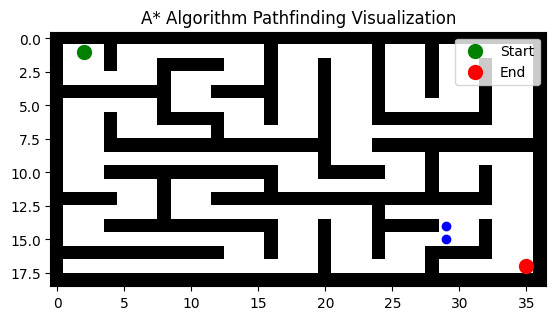

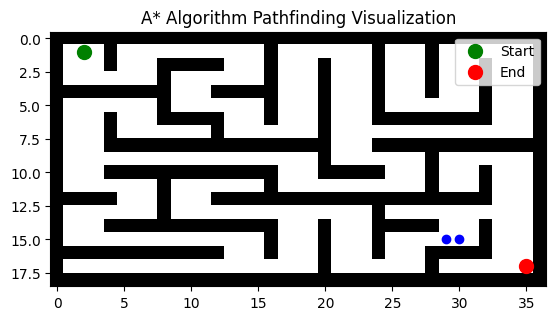

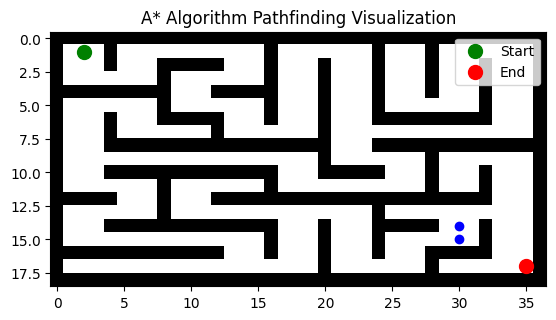

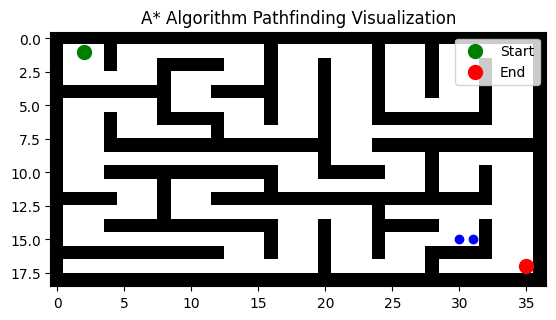

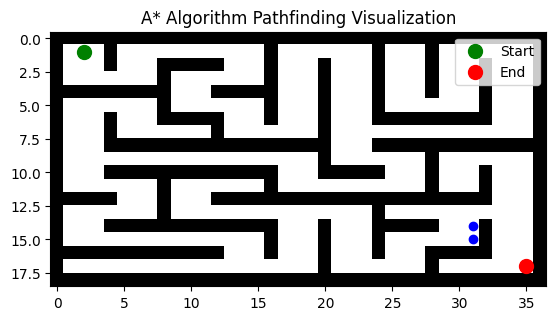

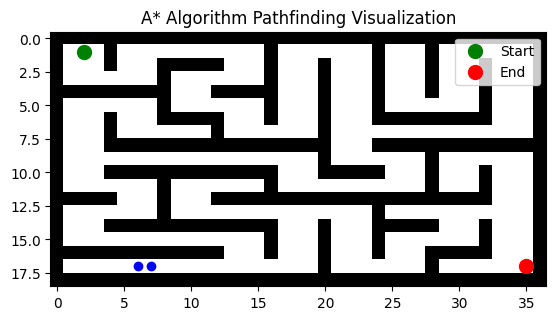

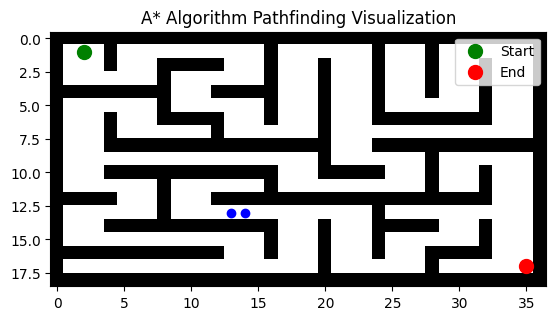

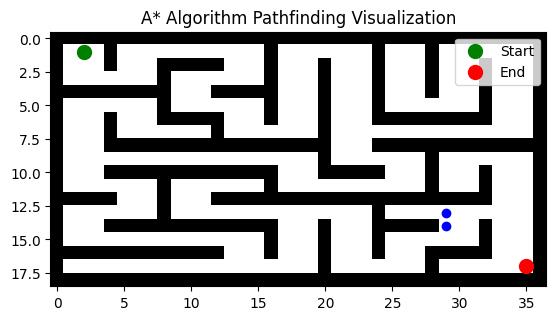

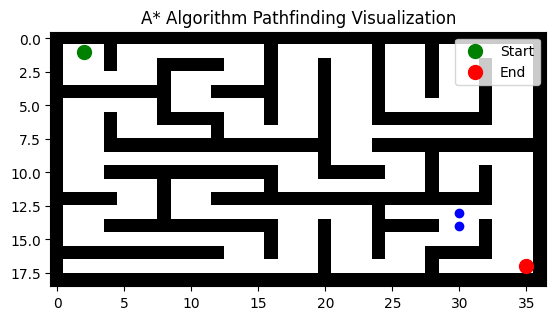

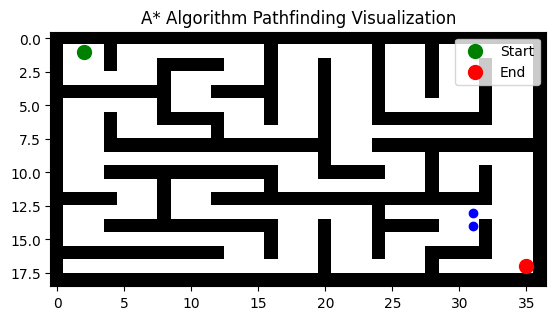

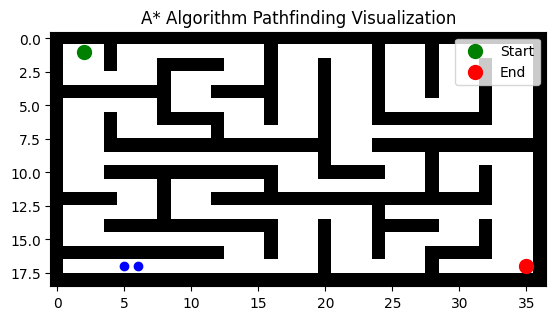

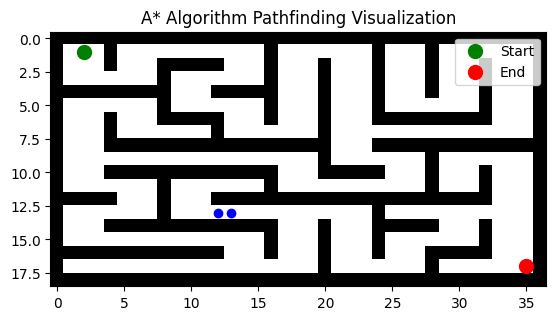

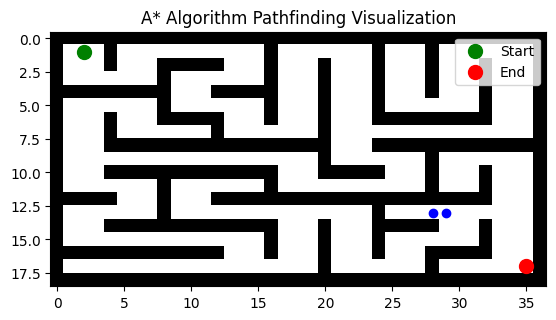

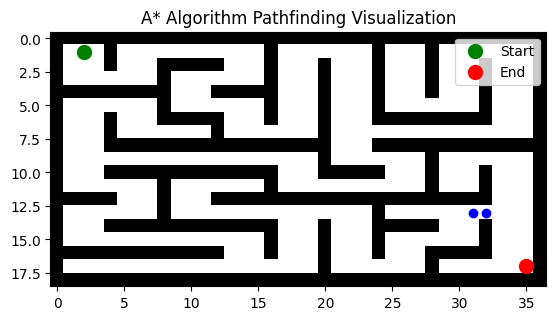

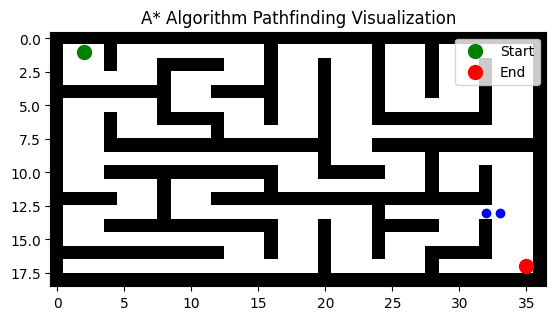

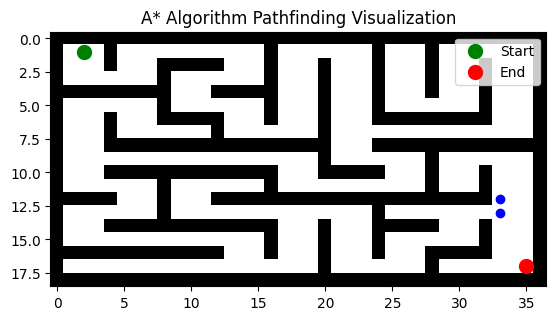

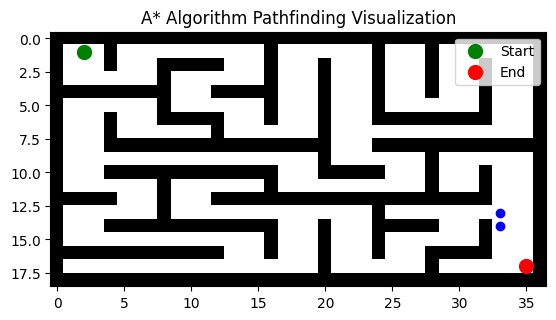

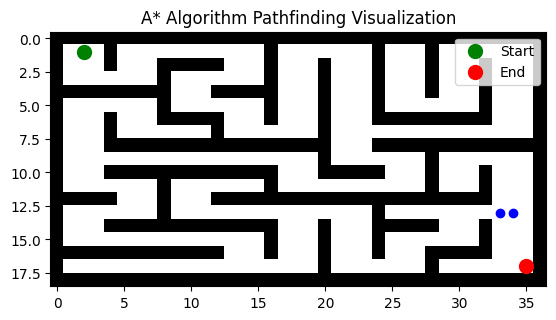

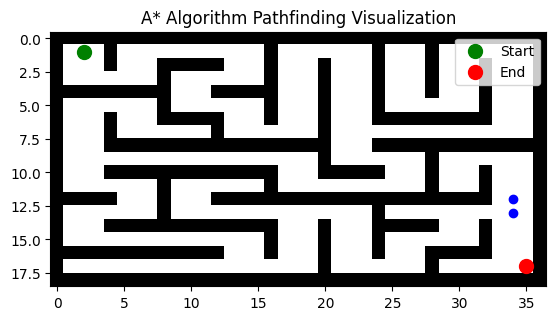

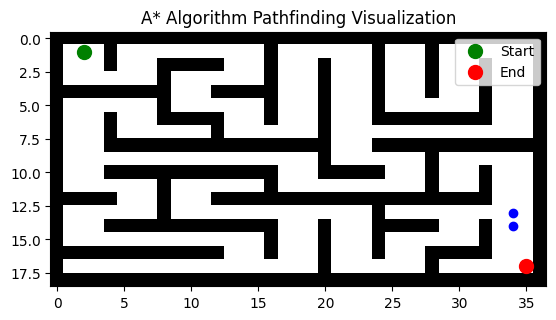

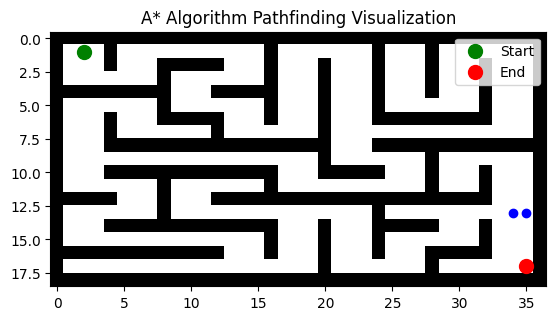

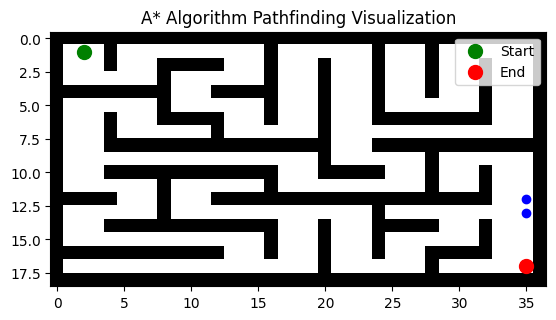

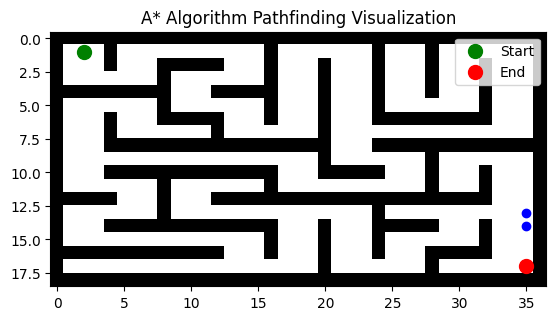

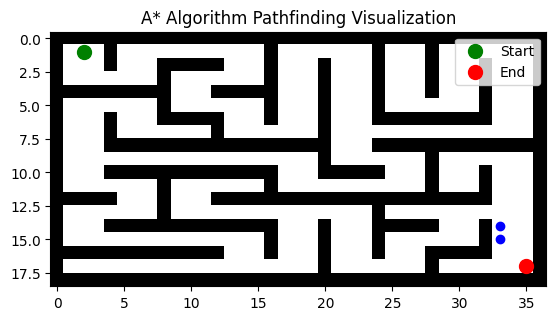

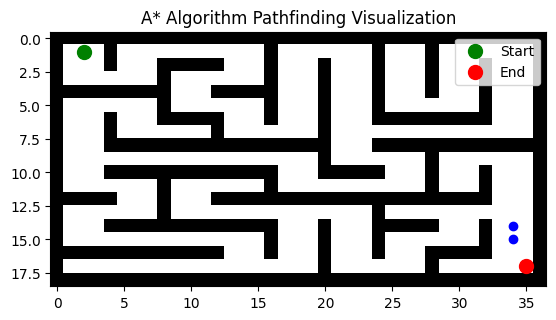

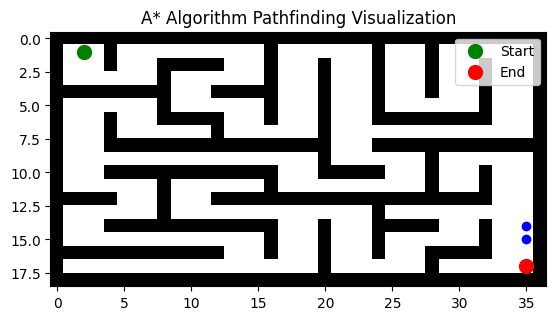

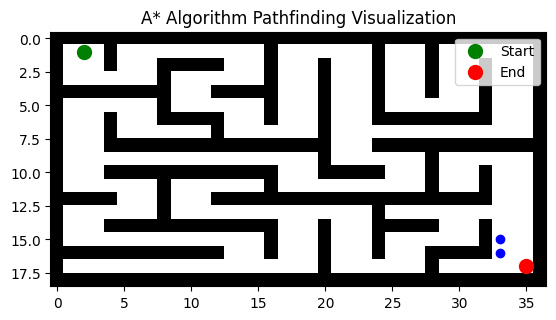

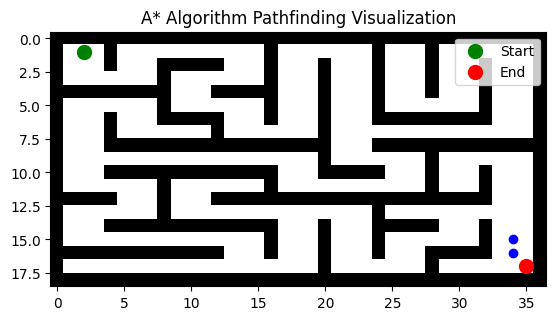

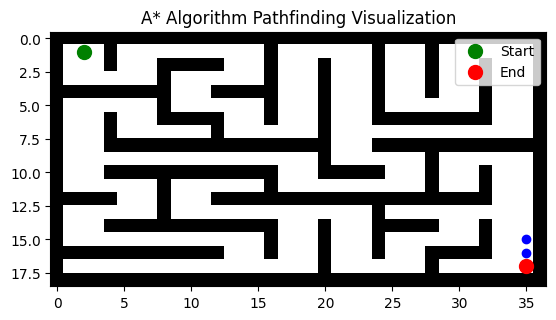

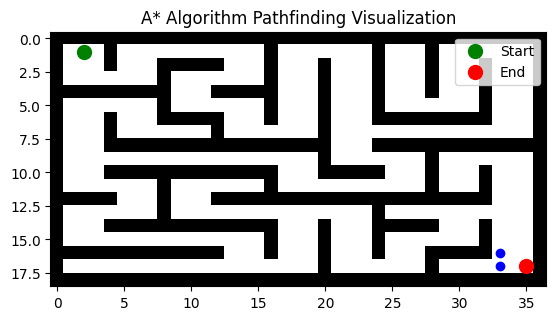

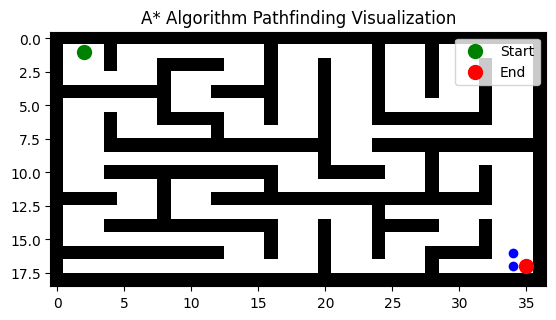

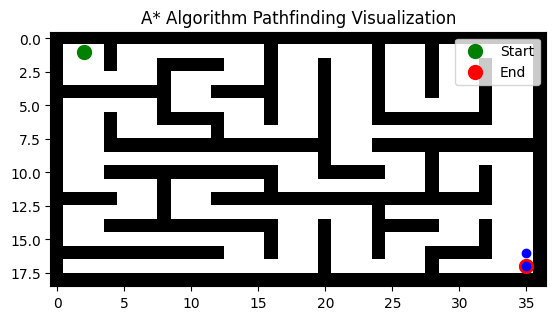

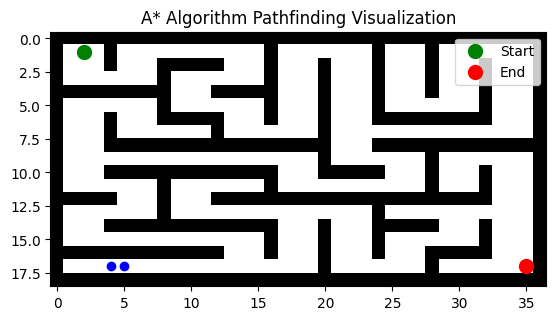

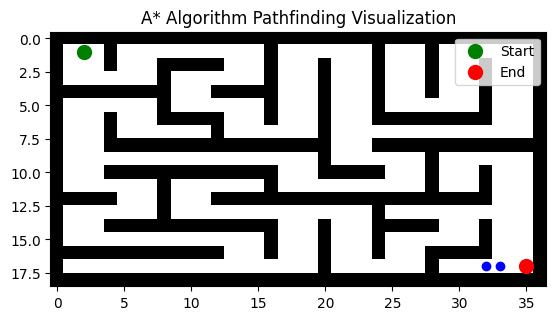

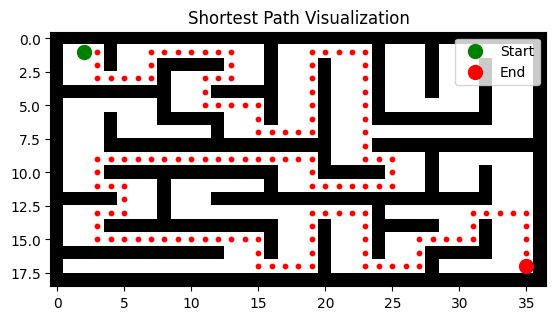

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Define the maze
maze_str = """
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X * X ********* X ***** X   X       X
X * X * XXXXX * X * X * X   X   X   X
X ***** X ***** X * X * X   X   X   X
XXXXXXXXX * XXXXX * X * X   X   X   X
X       X ***** X * X * X       X   X
X   X   XXXXX * X * X * XXXXXXXXX   X
X   X       X ***** X *             X
X   XXXXXXXXXXXXXXXXX * XXXXXXXXXXXXX
X ***************** X ***** X       X
X * XXXXXXXXXXXXX * XXXXX * X   X   X
X ***** X       X ********* X   X   X
XXXXX * X   XXXXXXXXXXXXXXXXXXXXX   X
X ***** X         ***** X     ***** X
X * XXXXXXXXXXXXX * X * XXXXX * X * X
X ************* X * X * X ***** X * X
XXXXXXXXXXXXX * X * X * X * XXXXX * X
X             ***** X ***** X     * X
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
"""

# Convert maze string to 2D list
maze = [list(row) for row in maze_str.split('\n') if row]

# Define the start and end positions
start = (1, 2)
end = (17, 35)

# Define directions for movement (up, down, left, right)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]


# Heuristic function (Manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


# A* algorithm
def a_star(maze, start, end):
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == end:
            return reconstruct_path(came_from, current)

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < len(maze) and 0 <= neighbor[1] < len(maze[0]):
                if maze[neighbor[0]][neighbor[1]] in (' ', '*'):
                    tentative_g_score = g_score[current] + 1
                    if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                        came_from[neighbor] = current
                        g_score[neighbor] = tentative_g_score
                        f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, end)
                        heapq.heappush(open_set, (f_score[neighbor], neighbor))
                        visualize_maze(maze, start, end, current, neighbor)

    return None


# Reconstruct the path
def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path


# Visualization function
def visualize_maze(maze, start, end, current, neighbor):
    plt.clf()
    maze_np = np.array([[1 if cell == 'X' else 0 for cell in row] for row in maze])
    plt.imshow(maze_np, cmap='gray_r')

    plt.scatter(start[1], start[0], color='green', s=100, label='Start')
    plt.scatter(end[1], end[0], color='red', s=100, label='End')

    if current and neighbor:
        plt.scatter([current[1], neighbor[1]], [current[0], neighbor[0]], color='blue')

    plt.legend()
    plt.title("A* Algorithm Pathfinding Visualization")
    plt.pause(0.01)


# Test the A* algorithm with visualization
def main():
    plt.figure(figsize=(12, 12))
    plt.ion()

    shortest_path = a_star(maze, start, end)

    plt.ioff()
    plt.clf()

    maze_np = np.array([[1 if cell == 'X' else 0 for cell in row] for row in maze])
    plt.imshow(maze_np, cmap='gray_r')

    for (x, y) in shortest_path:
        plt.scatter(y, x, color='red', s=10)

    plt.scatter(start[1], start[0], color='green', s=100, label='Start')
    plt.scatter(end[1], end[0], color='red', s=100, label='End')

    plt.legend()
    plt.title("Shortest Path Visualization")
    plt.show()


if __name__ == "__main__":
    main()
